# Synthetic Dataset for Risk Assessment and Loan Approval Modeling
This synthetic dataset comprises 20,000 records of personal and financial data, designed to facilitate the development of predictive models for risk assessment.
It serves two primary purposes:

> ` Risk Score Regression:` To predict a continuous risk score associated with each individual's likelihood of loan default or financial instability.

> ` Binary Classification: `To determine the binary outcome of loan approval, indicating whether an applicant is likely to be approved or denied for a loan.

The dataset includes diverse features such as demographic information, credit history, employment status, income levels, existing debt, and other relevant financial metrics, providing a comprehensive foundation for sophisticated data-driven analysis and decision-making.

In [169]:
#for data wrangling
import pandas as pd
import numpy as np

#far data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#for pre processing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder

# for evaluation
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

# model
# for reggression algorithms
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor,RandomForestRegressor,BaggingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

#for classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
# from xgboost import XGBRegressor
from sklearn import model_selection
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier


## Data

In [170]:
loan=pd.read_csv('Loan.csv')
loan

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2072-09-29,44,30180,587,Employed,High School,19,24521,36,Married,...,2515.000000,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,0,55.0
19996,2072-09-30,56,49246,567,Employed,Associate,33,25818,36,Married,...,4103.833333,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,0,54.0
19997,2072-10-01,44,48958,645,Employed,Bachelor,20,37033,72,Married,...,4079.833333,0.887216,3,103663,0.229533,0.226766,945.427454,0.357227,0,45.0
19998,2072-10-02,60,41025,560,Employed,High School,36,14760,72,Married,...,3418.750000,0.843787,5,10600,0.249760,0.264873,411.168284,0.408678,0,59.0


In [171]:
# from google.colab import drive
# drive.mount('/content/drive')

1. **ApplicationDate**: The date when the loan application was submitted.
2. **Age**: The age of the loan applicant.
3. **AnnualIncome**: The yearly income of the applicant, typically used to evaluate loan repayment capacity.
4. **CreditScore**: A numerical representation of the applicant’s creditworthiness based on their credit history.
5. **EmploymentStatus**: The current employment status of the applicant (e.g., employed, unemployed, self-employed).
6. **EducationLevel**: The highest level of education attained by the applicant.
7. **Experience**: The number of years the applicant has been in their current occupation or field.
8. **LoanAmount**: The amount of money the applicant is requesting as a loan.
9. **LoanDuration**: The period (in months or years) over which the loan is to be repaid.
10. **MaritalStatus**: The marital status of the applicant (e.g., single, married, divorced).
11. **NumberOfDependents**: The number of people financially dependent on the applicant (e.g., children, elderly parents).
12. **HomeOwnershipStatus**: Whether the applicant owns, rents, or has other living arrangements regarding their home.
13. **MonthlyDebtPayments**: The total amount the applicant is currently paying each month toward their existing debts.
14. **CreditCardUtilizationRate**: The percentage of available credit being used by the applicant (credit card balance divided by total credit limit).
15. **NumberOfOpenCreditLines**: The number of active credit accounts the applicant has (e.g., credit cards, loans).
16. **NumberOfCreditInquiries**: The number of times a credit inquiry has been made on the applicant’s account (usually when applying for credit).
17. **DebtToIncomeRatio**: The ratio of the applicant’s total monthly debt payments to their monthly income, used to assess their ability to take on more debt.
18. **BankruptcyHistory**: Indicates whether the applicant has filed for bankruptcy in the past.
19. **LoanPurpose**: The reason why the applicant is seeking the loan (e.g., home improvement, education, medical).
20. **PreviousLoanDefaults**: The number of times the applicant has defaulted on previous loans.
21. **PaymentHistory**: A record of the applicant’s past payments on loans and credit lines.
22. **LengthOfCreditHistory**: The number of years the applicant has had active credit accounts.
23. **SavingsAccountBalance**: The amount of money in the applicant’s savings account.
24. **CheckingAccountBalance**: The amount of money in the applicant’s checking account.
25. **TotalAssets**: The total value of assets owned by the applicant (e.g., property, vehicles, investments).
26. **TotalLiabilities**: The total amount of liabilities (debts) the applicant owes.
27. **MonthlyIncome**: The applicant’s total monthly income.
28. **UtilityBillsPaymentHistory**: A record of how well the applicant has managed paying their utility bills.
29. **JobTenure**: The length of time the applicant has held their current job.
30. **NetWorth**: The difference between the applicant’s total assets and total liabilities.
31. **BaseInterestRate**: The general interest rate set by the financial institution or the market.
32. **InterestRate**: The specific interest rate offered to the applicant for the loan.
33. **MonthlyLoanPayment**: The amount the applicant will need to pay each month to repay the loan.
34. **TotalDebtToIncomeRatio**: A more comprehensive debt-to-income ratio that includes all of the applicant’s liabilities.
35. **`LoanApproved`**: Indicates whether the loan was approved or not (usually binary: Yes/No).
36. **`RiskScore`**: A score representing the risk level of the applicant, usually derived from various financial and personal factors to help determine loan approval and interest rate.

## Understanding data

In [172]:
loan.shape

(20000, 36)

In [173]:
loan.sample()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
16617,2063-07-01,65,36808,643,Employed,Doctorate,38,15757,60,Married,...,3067.333333,0.916008,4,6918,0.199257,0.196311,414.236729,0.284689,0,56.0


In [174]:
loan.info()
#

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [175]:
print(f"loan approval dataset has {loan.shape[0]} occurences and {loan.shape[1]} features !")


loan approval dataset has 20000 occurences and 36 features !


In [176]:
print('The feature of dataset are:')
features=len(loan.columns)
feature_list=[feature for feature in loan.columns]

for feature in feature_list:
    print(feature)


The feature of dataset are:
ApplicationDate
Age
AnnualIncome
CreditScore
EmploymentStatus
EducationLevel
Experience
LoanAmount
LoanDuration
MaritalStatus
NumberOfDependents
HomeOwnershipStatus
MonthlyDebtPayments
CreditCardUtilizationRate
NumberOfOpenCreditLines
NumberOfCreditInquiries
DebtToIncomeRatio
BankruptcyHistory
LoanPurpose
PreviousLoanDefaults
PaymentHistory
LengthOfCreditHistory
SavingsAccountBalance
CheckingAccountBalance
TotalAssets
TotalLiabilities
MonthlyIncome
UtilityBillsPaymentHistory
JobTenure
NetWorth
BaseInterestRate
InterestRate
MonthlyLoanPayment
TotalDebtToIncomeRatio
LoanApproved
RiskScore


In [177]:
loan.describe()

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,39.752600,59161.473550,571.612400,17.522750,24882.867800,54.057000,1.517300,454.292700,0.286381,3.023350,...,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.766780
std,11.622713,40350.845168,50.997358,11.316836,13427.421217,24.664857,1.386325,240.507609,0.159793,1.736161,...,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.778262
min,18.000000,15000.000000,343.000000,0.000000,3674.000000,12.000000,0.000000,50.000000,0.000974,0.000000,...,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,28.800000
25%,32.000000,31679.000000,540.000000,9.000000,15575.000000,36.000000,0.000000,286.000000,0.160794,2.000000,...,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,40.000000,48566.000000,578.000000,17.000000,21914.500000,48.000000,1.000000,402.000000,0.266673,3.000000,...,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,48.000000,74391.000000,609.000000,25.000000,30835.000000,72.000000,2.000000,564.000000,0.390634,4.000000,...,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,0.000000,56.000000
max,80.000000,485341.000000,712.000000,61.000000,184732.000000,120.000000,5.000000,2919.000000,0.917380,13.000000,...,25000.000000,0.999433,16.000000,2.603208e+06,0.405029,0.446787,10892.629520,4.647657,1.000000,84.000000


In [178]:
loan.describe(include=['O'])
#top=mode

,ApplicationDate,EmploymentStatus,EducationLevel,MaritalStatus,HomeOwnershipStatus,LoanPurpose
count,20000,20000,20000,20000,20000,20000
unique,20000,3,5,4,4,5
top,2018-01-01,Employed,Bachelor,Married,Mortgage,Home
freq,1,17036,6054,10041,7939,5925


## Data visualisation

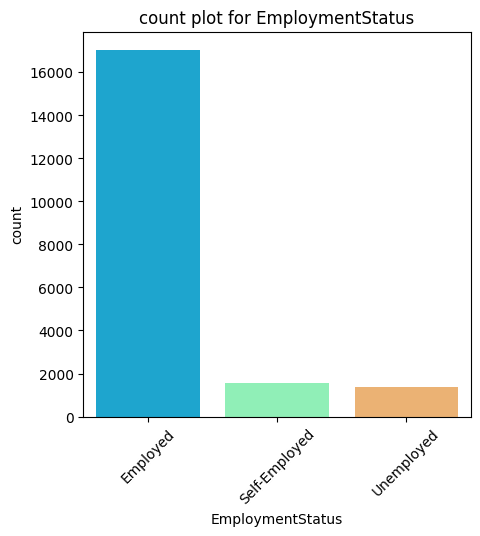

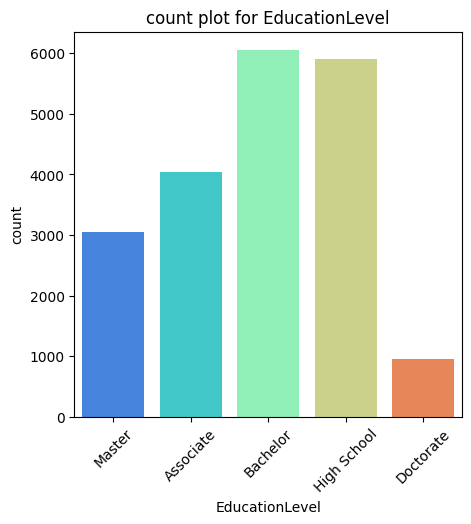

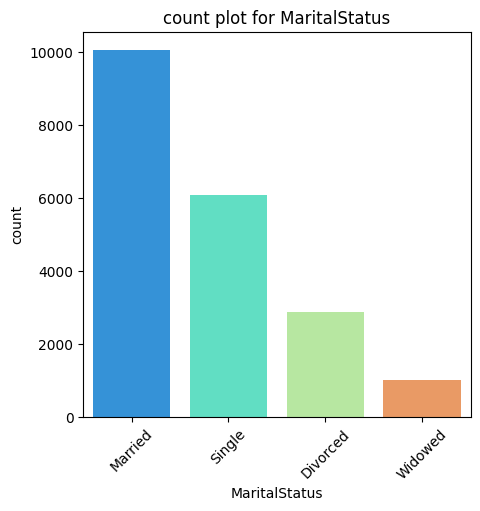

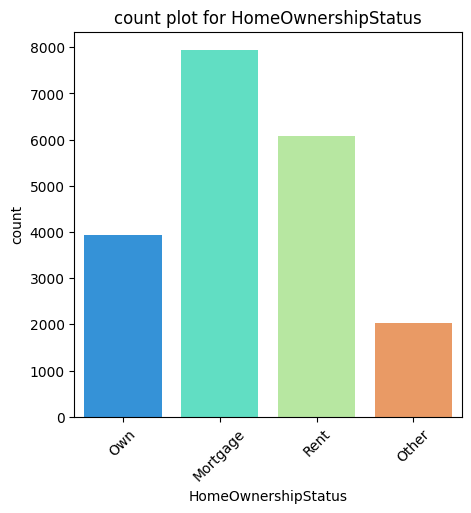

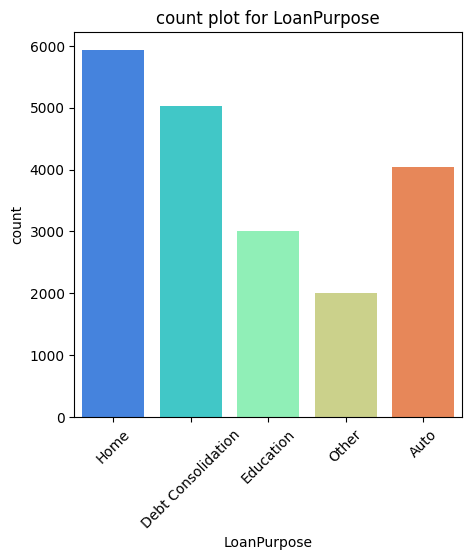

In [179]:
catagorical_columns=loan.select_dtypes(include=['object','category']).columns.tolist()#Selects only the columns of data type object (usually strings) or category.
#tolist(): Converts the column names from an Index object to a regular Python list.

for col in catagorical_columns[1:]:# skip the first feature
    plt.figure(figsize=(5,5))
    sns.countplot(data=loan,x=col , hue=col, palette='rainbow')
    plt.title(f'count plot for {col}')
    plt.xticks(rotation=45)
    plt.show()

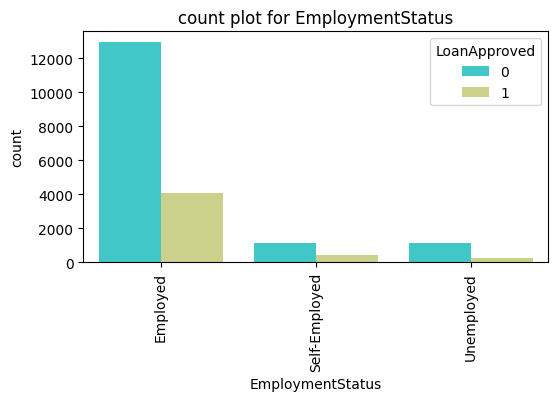

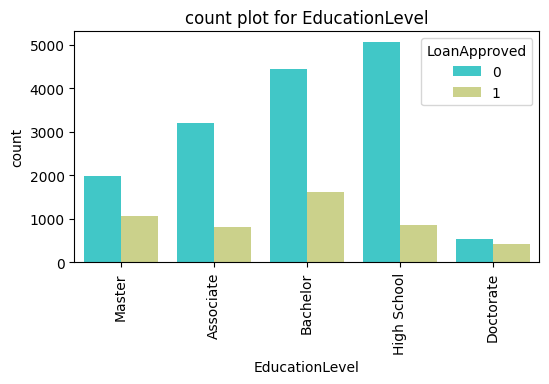

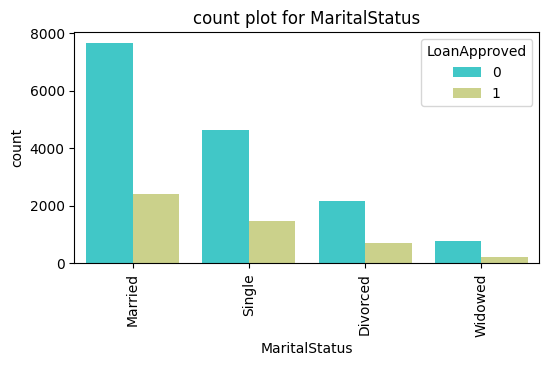

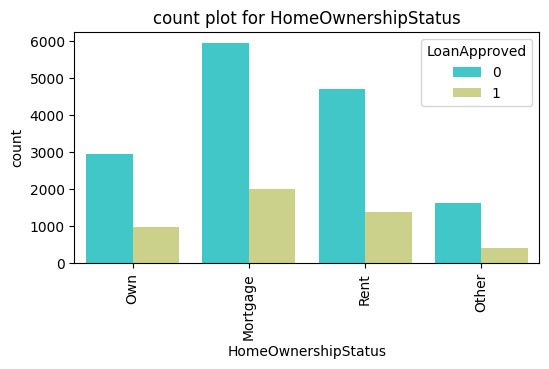

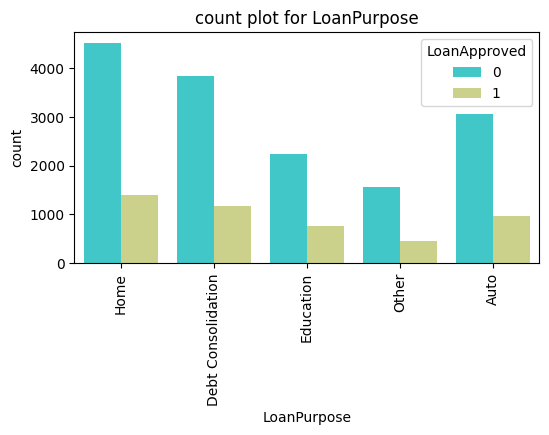

In [180]:

for col in catagorical_columns[1:]:# skip the first feature
    plt.figure(figsize=(6,3))
    sns.countplot(data=loan,x=col , hue='LoanApproved', palette='rainbow')
    plt.title(f'count plot for {col}')
    plt.xticks(rotation=90)
    plt.show()

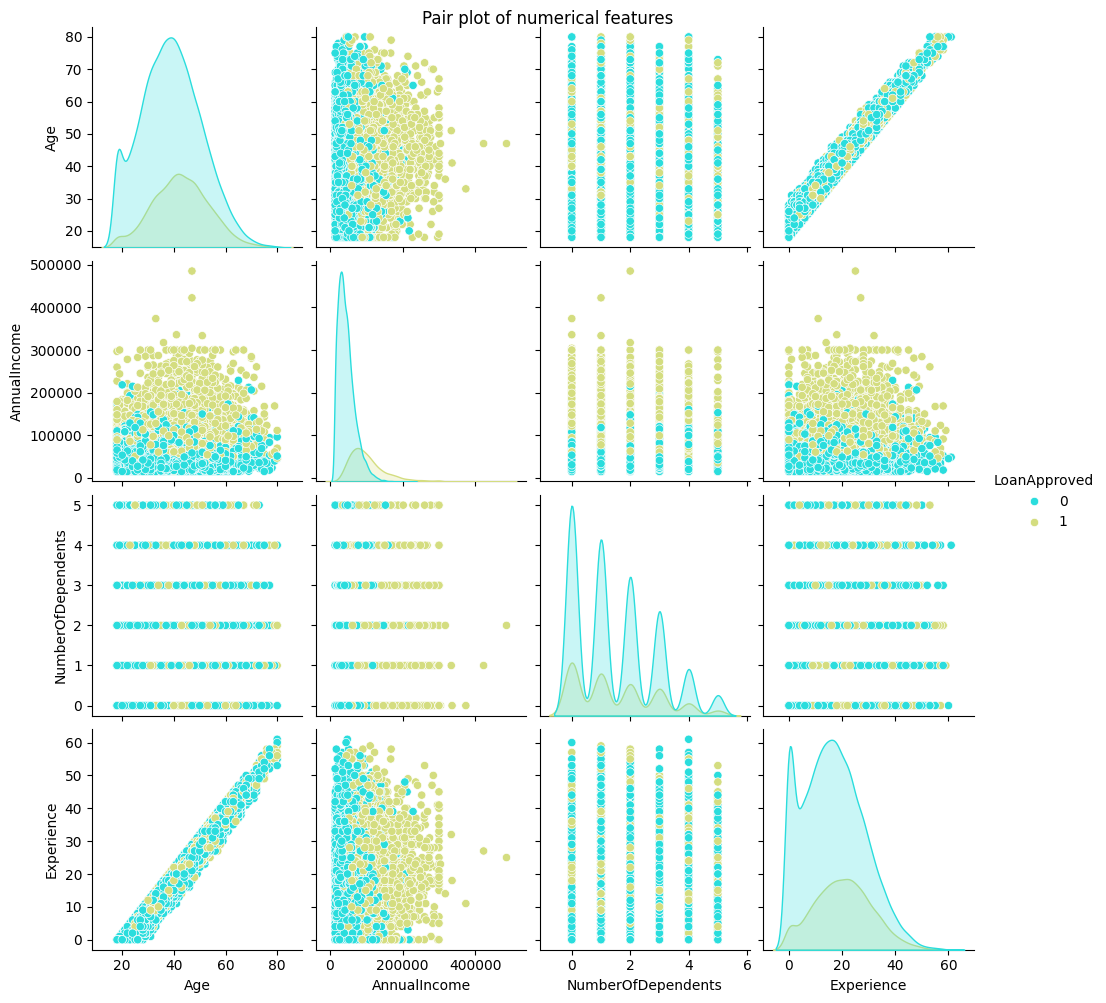

In [181]:
#multivariate analysis: pair plot of numerical features (personal details)
sns.pairplot(loan[['Age','AnnualIncome','NumberOfDependents','LoanApproved','Experience']],hue="LoanApproved",palette='rainbow')
plt.suptitle('Pair plot of numerical features',y=1)
plt.show()

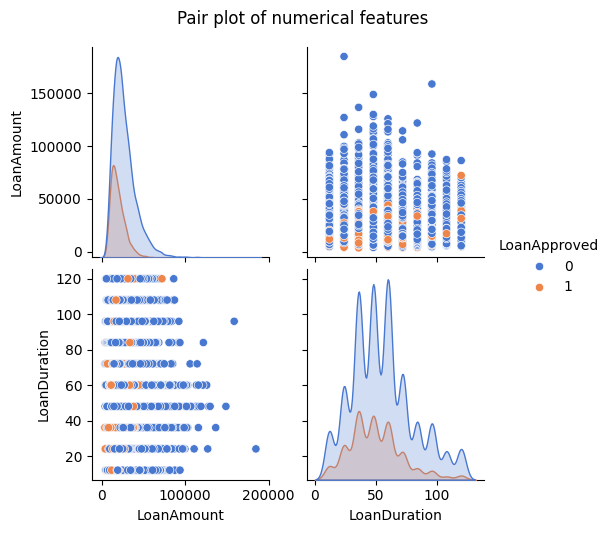

In [182]:
sns.pairplot(loan[['LoanAmount','LoanDuration','LoanApproved']],hue="LoanApproved",palette='muted')
plt.suptitle('Pair plot of numerical features',y=1.05)
plt.show()

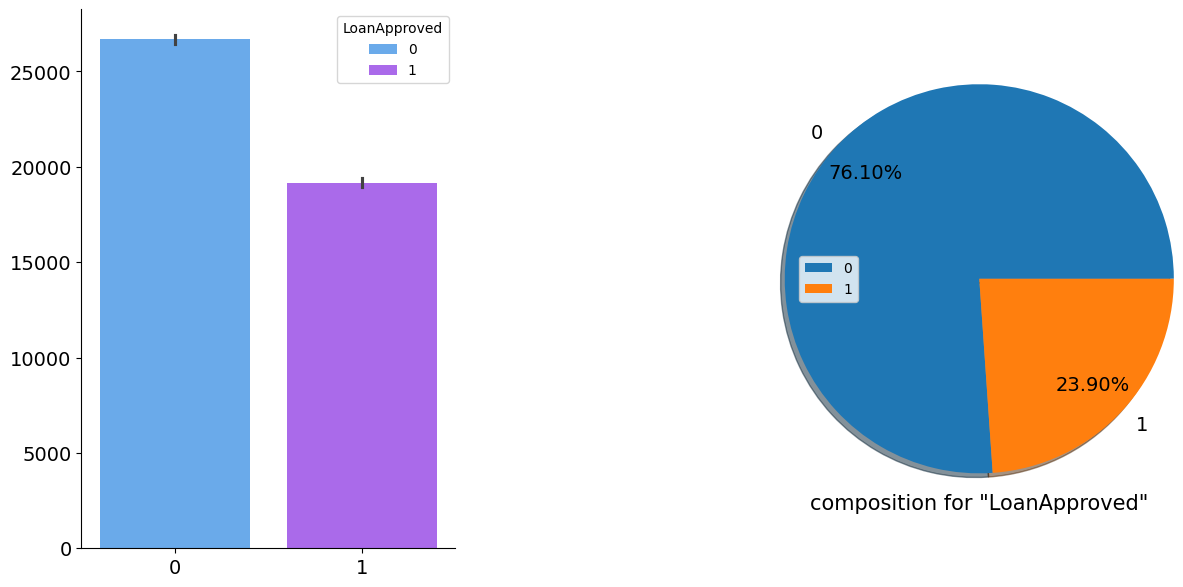

In [183]:
#checkimg target
plt.figure(figsize=(14,7))
#bar plot
ax1=plt.subplot(1,2,1)
sns.barplot(data=loan,x='LoanApproved',y='LoanAmount',hue='LoanApproved',palette='cool')
ax1.set_xlabel('')
ax1.set_ylabel('')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True,right=True)

#pie plot
ax2=plt.subplot(1,2,2)
plt.pie(x=loan['LoanApproved'].value_counts(),
        labels=list(loan['LoanApproved'].unique()),
        autopct='%2.2f%%',
        pctdistance=0.8,
        shadow=True,
        radius=1.3,
        textprops={'fontsize':14})
plt.legend()
ax2.set_xlabel('')
plt.xlabel('composition for "LoanApproved"',fontsize=15,labelpad=20)
plt.subplots_adjust(wspace=0.9)

plt.show()


## Checking missing values

In [184]:
loan.isnull().sum().sum()# check toatal null values from the data


0

In [185]:
loan.isnull().sum()# check null values by feature vise

ApplicationDate               0
Age                           0
AnnualIncome                  0
CreditScore                   0
EmploymentStatus              0
EducationLevel                0
Experience                    0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
NetWorth                      0
BaseInterestRate              0
Interest

In [186]:
loan.duplicated().sum()# to get duplicated rows

0

## Feature Engineering

In [187]:
loan['BankBalance']=loan['SavingsAccountBalance']+loan['CheckingAccountBalance']

loan.drop('SavingsAccountBalance',axis=1,inplace=True)
loan.drop('CheckingAccountBalance',axis=1,inplace=True)

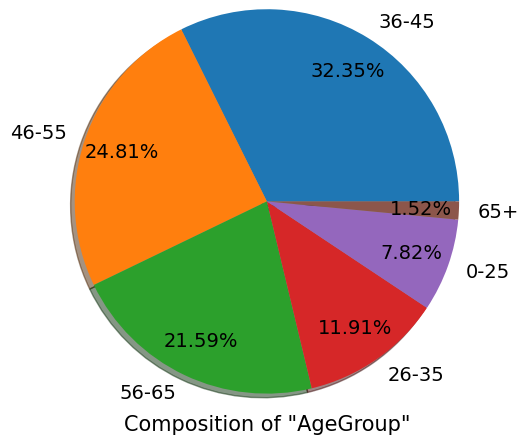

In [188]:
#age binning(transform numerical into catagorical)

loan['AgeGroup']=pd.cut(loan['Age'],bins=[0,25,35,45,55,65,100],
                        labels=['0-25','26-35','36-45','46-55','56-65','65+'])
plt.pie(x=loan['AgeGroup'].value_counts(),
labels=list(loan['AgeGroup'].unique()),
autopct='%2.2f%%',
pctdistance=0.8,
shadow=True,
radius=1.3,
textprops={'fontsize':14})
plt.xlabel('Composition of "AgeGroup"',fontsize=15,labelpad=20)
plt.show()

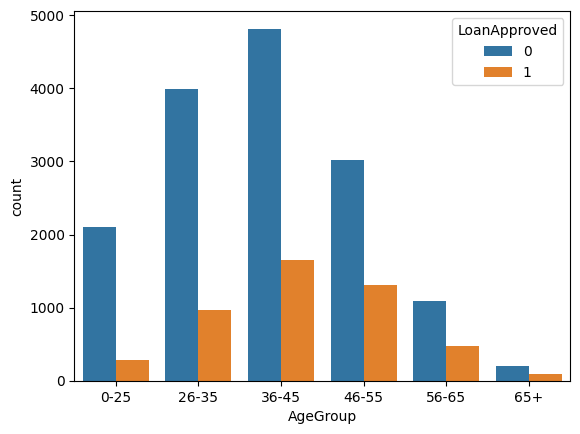

In [189]:
sns.countplot(data=loan,x='AgeGroup',hue='LoanApproved')
plt.show()

In [190]:
loan.drop('AgeGroup',axis=1,inplace=True)

In [191]:
loan[['Year','Month','Day']]=loan['ApplicationDate'].str.split('-',expand=True)

loan['Year']=loan['Year'].astype(int)   #astype(int);
loan['Month']=loan['Month'].astype(int)
loan['Day']=loan['Day'].astype(int)

loan[['ApplicationDate','Year','Month','Day']]

,ApplicationDate,Year,Month,Day
0,2018-01-01,2018,1,1
1,2018-01-02,2018,1,2
2,2018-01-03,2018,1,3
3,2018-01-04,2018,1,4
4,2018-01-05,2018,1,5
...,...,...,...,...
19995,2072-09-29,2072,9,29
19996,2072-09-30,2072,9,30
19997,2072-10-01,2072,10,1
19998,2072-10-02,2072,10,2


In [192]:
loan.drop(['ApplicationDate','Year','Month','Day'],axis=1,inplace=True)

## Encoding

In [193]:
catagorical_columns=loan.select_dtypes(include=['object','category']).columns.tolist()
print('Categorical Columns:',catagorical_columns)

Categorical Columns: ['EmploymentStatus', 'EducationLevel', 'MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose']


### 1: Ordinal Data

In [194]:
loan['EmploymentStatus'].unique() # unique values

array(['Employed', 'Self-Employed', 'Unemployed'], dtype=object)

In [195]:
loan['EmploymentStatus'].nunique() # no: of unique values


3

In [196]:
loan['EmploymentStatus']=loan['EmploymentStatus'].map({'Employed':0, 'Self-Employed':1, 'Unemployed':2})
loan['EmploymentStatus'].unique()

array([0, 1, 2], dtype=int64)

In [197]:
loan['EducationLevel'].unique()

array(['Master', 'Associate', 'Bachelor', 'High School', 'Doctorate'],
      dtype=object)

In [198]:
loan['EducationLevel']=loan['EducationLevel'].map({'High School':0,'Associate':1,'Bachelor':2,'Master':3,'Doctorate':4})
loan['EducationLevel'].unique()

array([3, 1, 2, 0, 4], dtype=int64)

In [199]:
loan['HomeOwnershipStatus'].unique()

array(['Own', 'Mortgage', 'Rent', 'Other'], dtype=object)

In [200]:
loan['HomeOwnershipStatus']=loan['HomeOwnershipStatus'].map({ 'Rent':0,'Other':1,'Mortgage':2,'Own':3})
loan['HomeOwnershipStatus'].unique()

array([3, 2, 0, 1], dtype=int64)

### 2: Nominal Data

In [201]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         20000 non-null  int64  
 1   AnnualIncome                20000 non-null  int64  
 2   CreditScore                 20000 non-null  int64  
 3   EmploymentStatus            20000 non-null  int64  
 4   EducationLevel              20000 non-null  int64  
 5   Experience                  20000 non-null  int64  
 6   LoanAmount                  20000 non-null  int64  
 7   LoanDuration                20000 non-null  int64  
 8   MaritalStatus               20000 non-null  object 
 9   NumberOfDependents          20000 non-null  int64  
 10  HomeOwnershipStatus         20000 non-null  int64  
 11  MonthlyDebtPayments         20000 non-null  int64  
 12  CreditCardUtilizationRate   20000 non-null  float64
 13  NumberOfOpenCreditLines     200

In [202]:
le=LabelEncoder()
for col in loan.select_dtypes('object').columns:
    loan[col]=le.fit_transform(loan[col])

In [203]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         20000 non-null  int64  
 1   AnnualIncome                20000 non-null  int64  
 2   CreditScore                 20000 non-null  int64  
 3   EmploymentStatus            20000 non-null  int64  
 4   EducationLevel              20000 non-null  int64  
 5   Experience                  20000 non-null  int64  
 6   LoanAmount                  20000 non-null  int64  
 7   LoanDuration                20000 non-null  int64  
 8   MaritalStatus               20000 non-null  int32  
 9   NumberOfDependents          20000 non-null  int64  
 10  HomeOwnershipStatus         20000 non-null  int64  
 11  MonthlyDebtPayments         20000 non-null  int64  
 12  CreditCardUtilizationRate   20000 non-null  float64
 13  NumberOfOpenCreditLines     200

## Handling outlier

In [204]:

# # Create a copy of original data for comparison
# loan_copy=loan.copy()

# def remove_outliers_iqr(df,exclude_columns):
#   #loop through numeric column
#   for column in df.select_dtypes(include=['number']):
#     if column in exclude_columns:
#       continue #skip excluded columns

#     Q1=df[column].quantile(0.25)
#     Q3=df[column].quantile(0.75)
#     IQR = Q3 - Q1

#     #define outlier bounds
#     lower_bound= Q1 - 1.5 * IQR
#     upper_bound= Q3 + 1.5 * IQR

#     #filter outthe outliers
#     df=df[(df[column] >= lower_bound) &( df[column] <= upper_bound)]

#   return df

# # Define the column to exclude
# exclude_columns=['LoanApproved','RiskScore']

# #remove outlier
# loan=remove_outliers_iqr(loan,exclude_columns)

# #print shapes of data before and after removing outliers
# print('shapes of data before removing outliers:',loan_copy.shape)

# print('shapes of data after removing outliers:',loan.shape)

# print('Number of outliers removed:',loan_copy.shape[0]-loan.shape[0])

#OUTPUT
# shapes of data before removing outliers: (20000, 34)
# shapes of data after removing outliers: (7978, 34)
# Number of outliers removed: 12022

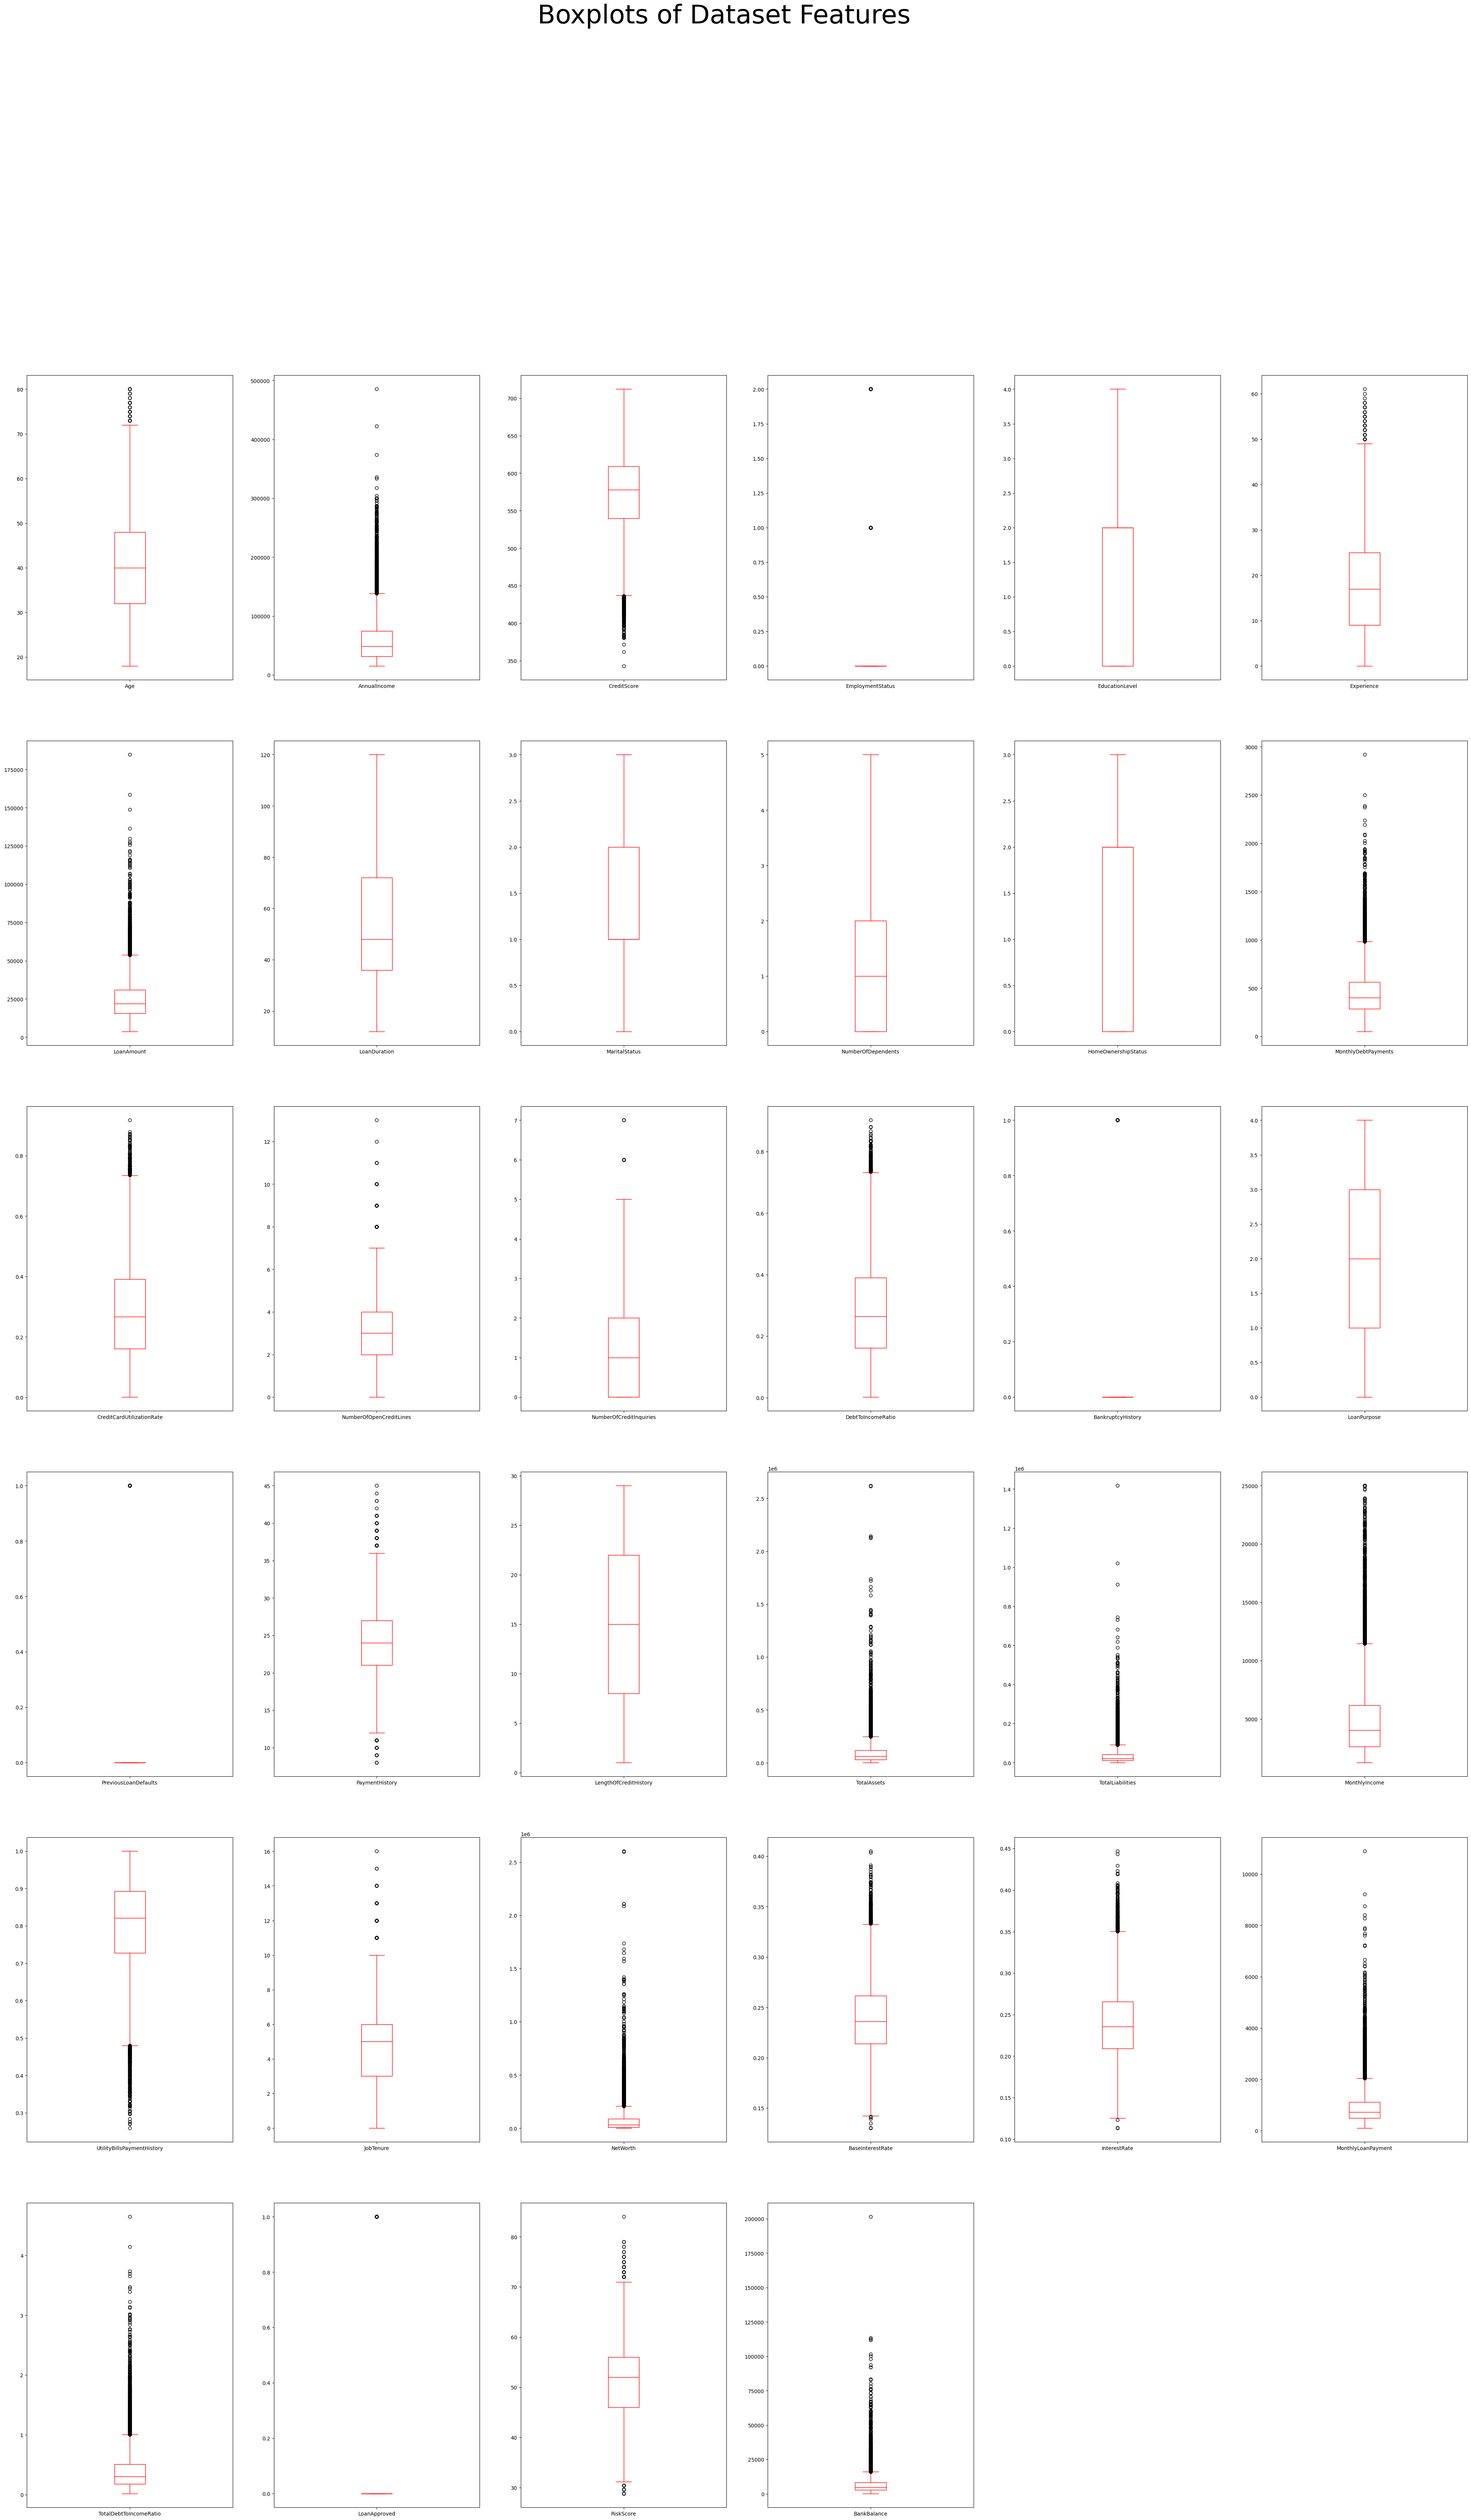

In [205]:
loan.plot(kind='box',subplots=True,layout=(8,6),figsize=(50,100),color='red')
plt.suptitle('Boxplots of Dataset Features', fontsize=50)
plt.show()

In [206]:

# Create a copy of original data for comparison
loan_copy=loan.copy()

def remove_outliers_iqr(df,exclude_columns):
  #loop through numeric column
  for column in df.select_dtypes(include=['number']):
    if column in exclude_columns:
      continue #skip excluded columns

    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR = Q3 - Q1

    #define outlier bounds
    lower_bound= Q1 - 1.5 * IQR
    upper_bound= Q3 + 1.5 * IQR

    #filter outthe outliers
    df=df[(df[column] >= lower_bound) &( df[column] <= upper_bound)]

  return df

# Define the column to exclude
exclude_columns=['LoanApproved','RiskScore']

#remove outlier
loan=remove_outliers_iqr(loan,exclude_columns)

#print shapes of data before and after removing outliers
print('shapes of data before removing outliers:',loan_copy.shape)

print('shapes of data after removing outliers:',loan.shape)

print('Number of outliers removed:',loan_copy.shape[0]-loan.shape[0])

shapes of data before removing outliers: (20000, 34)
shapes of data after removing outliers: (7978, 34)
Number of outliers removed: 12022


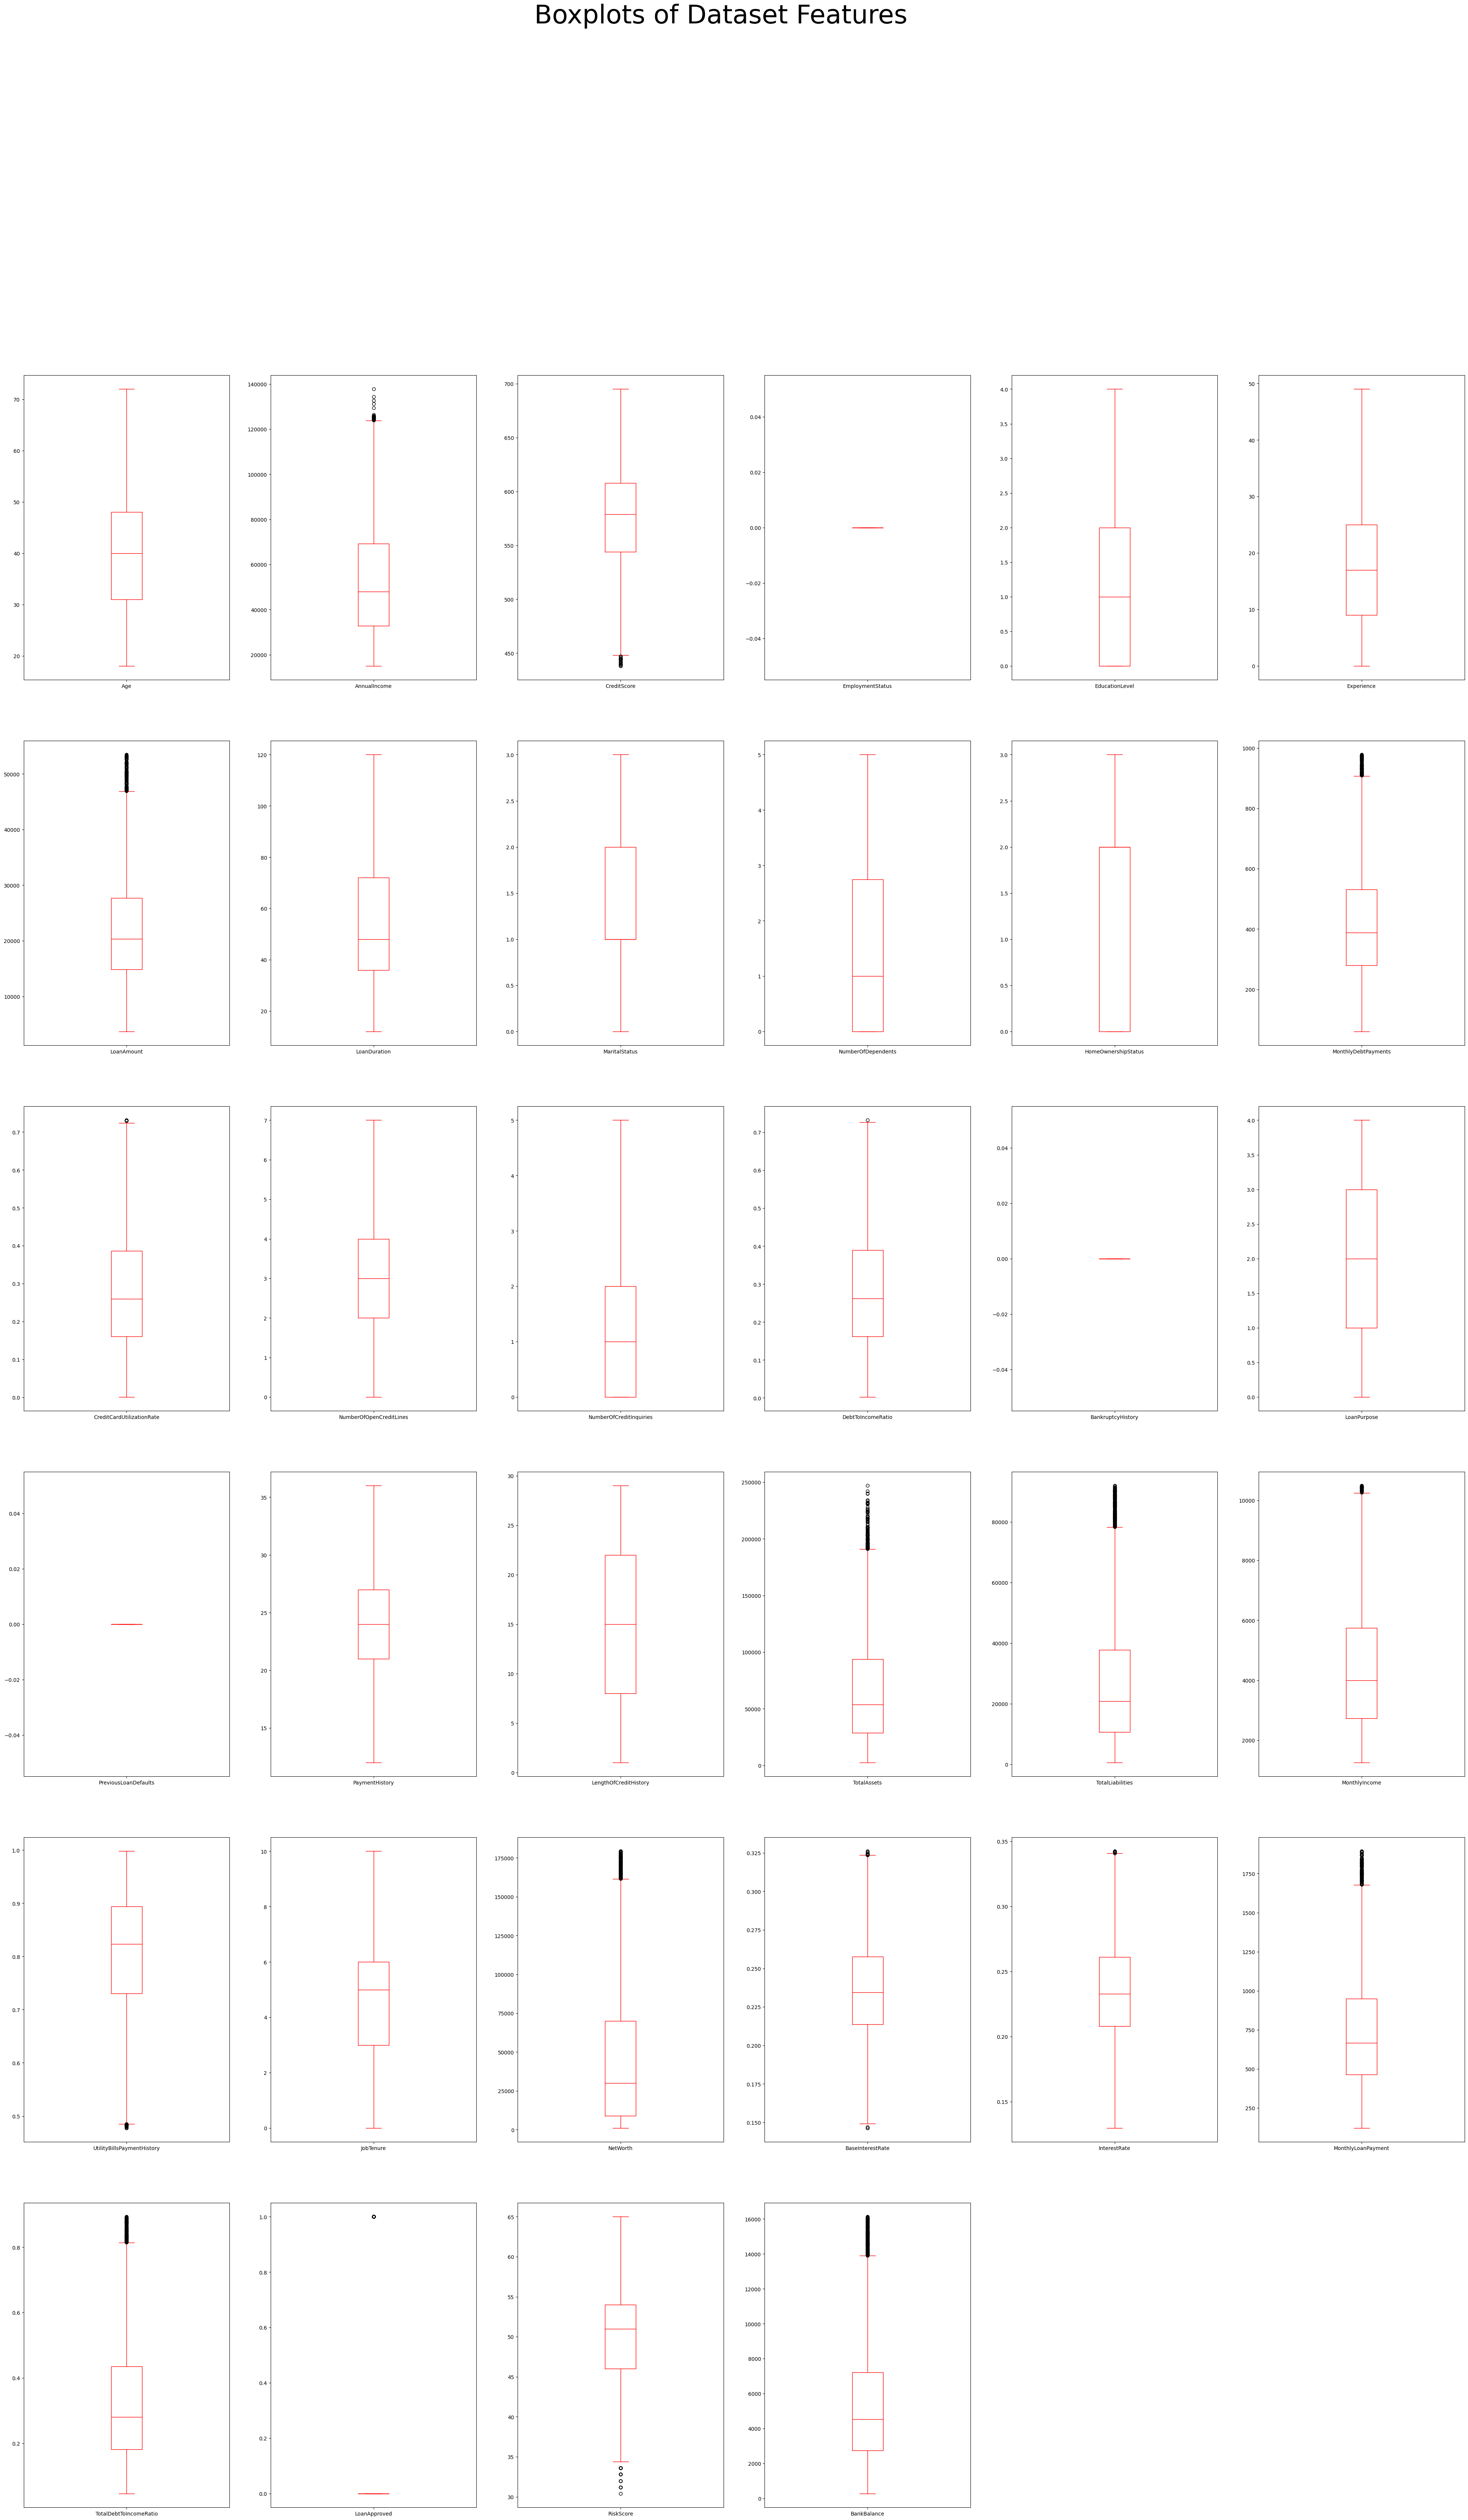

In [207]:
loan.plot(kind='box',subplots=True,layout=(8,6),figsize=(50,100),color='red')
plt.suptitle('Boxplots of Dataset Features', fontsize=50)
plt.show()

## Data Transformation

### 1: Skewed Data

#### Histogram

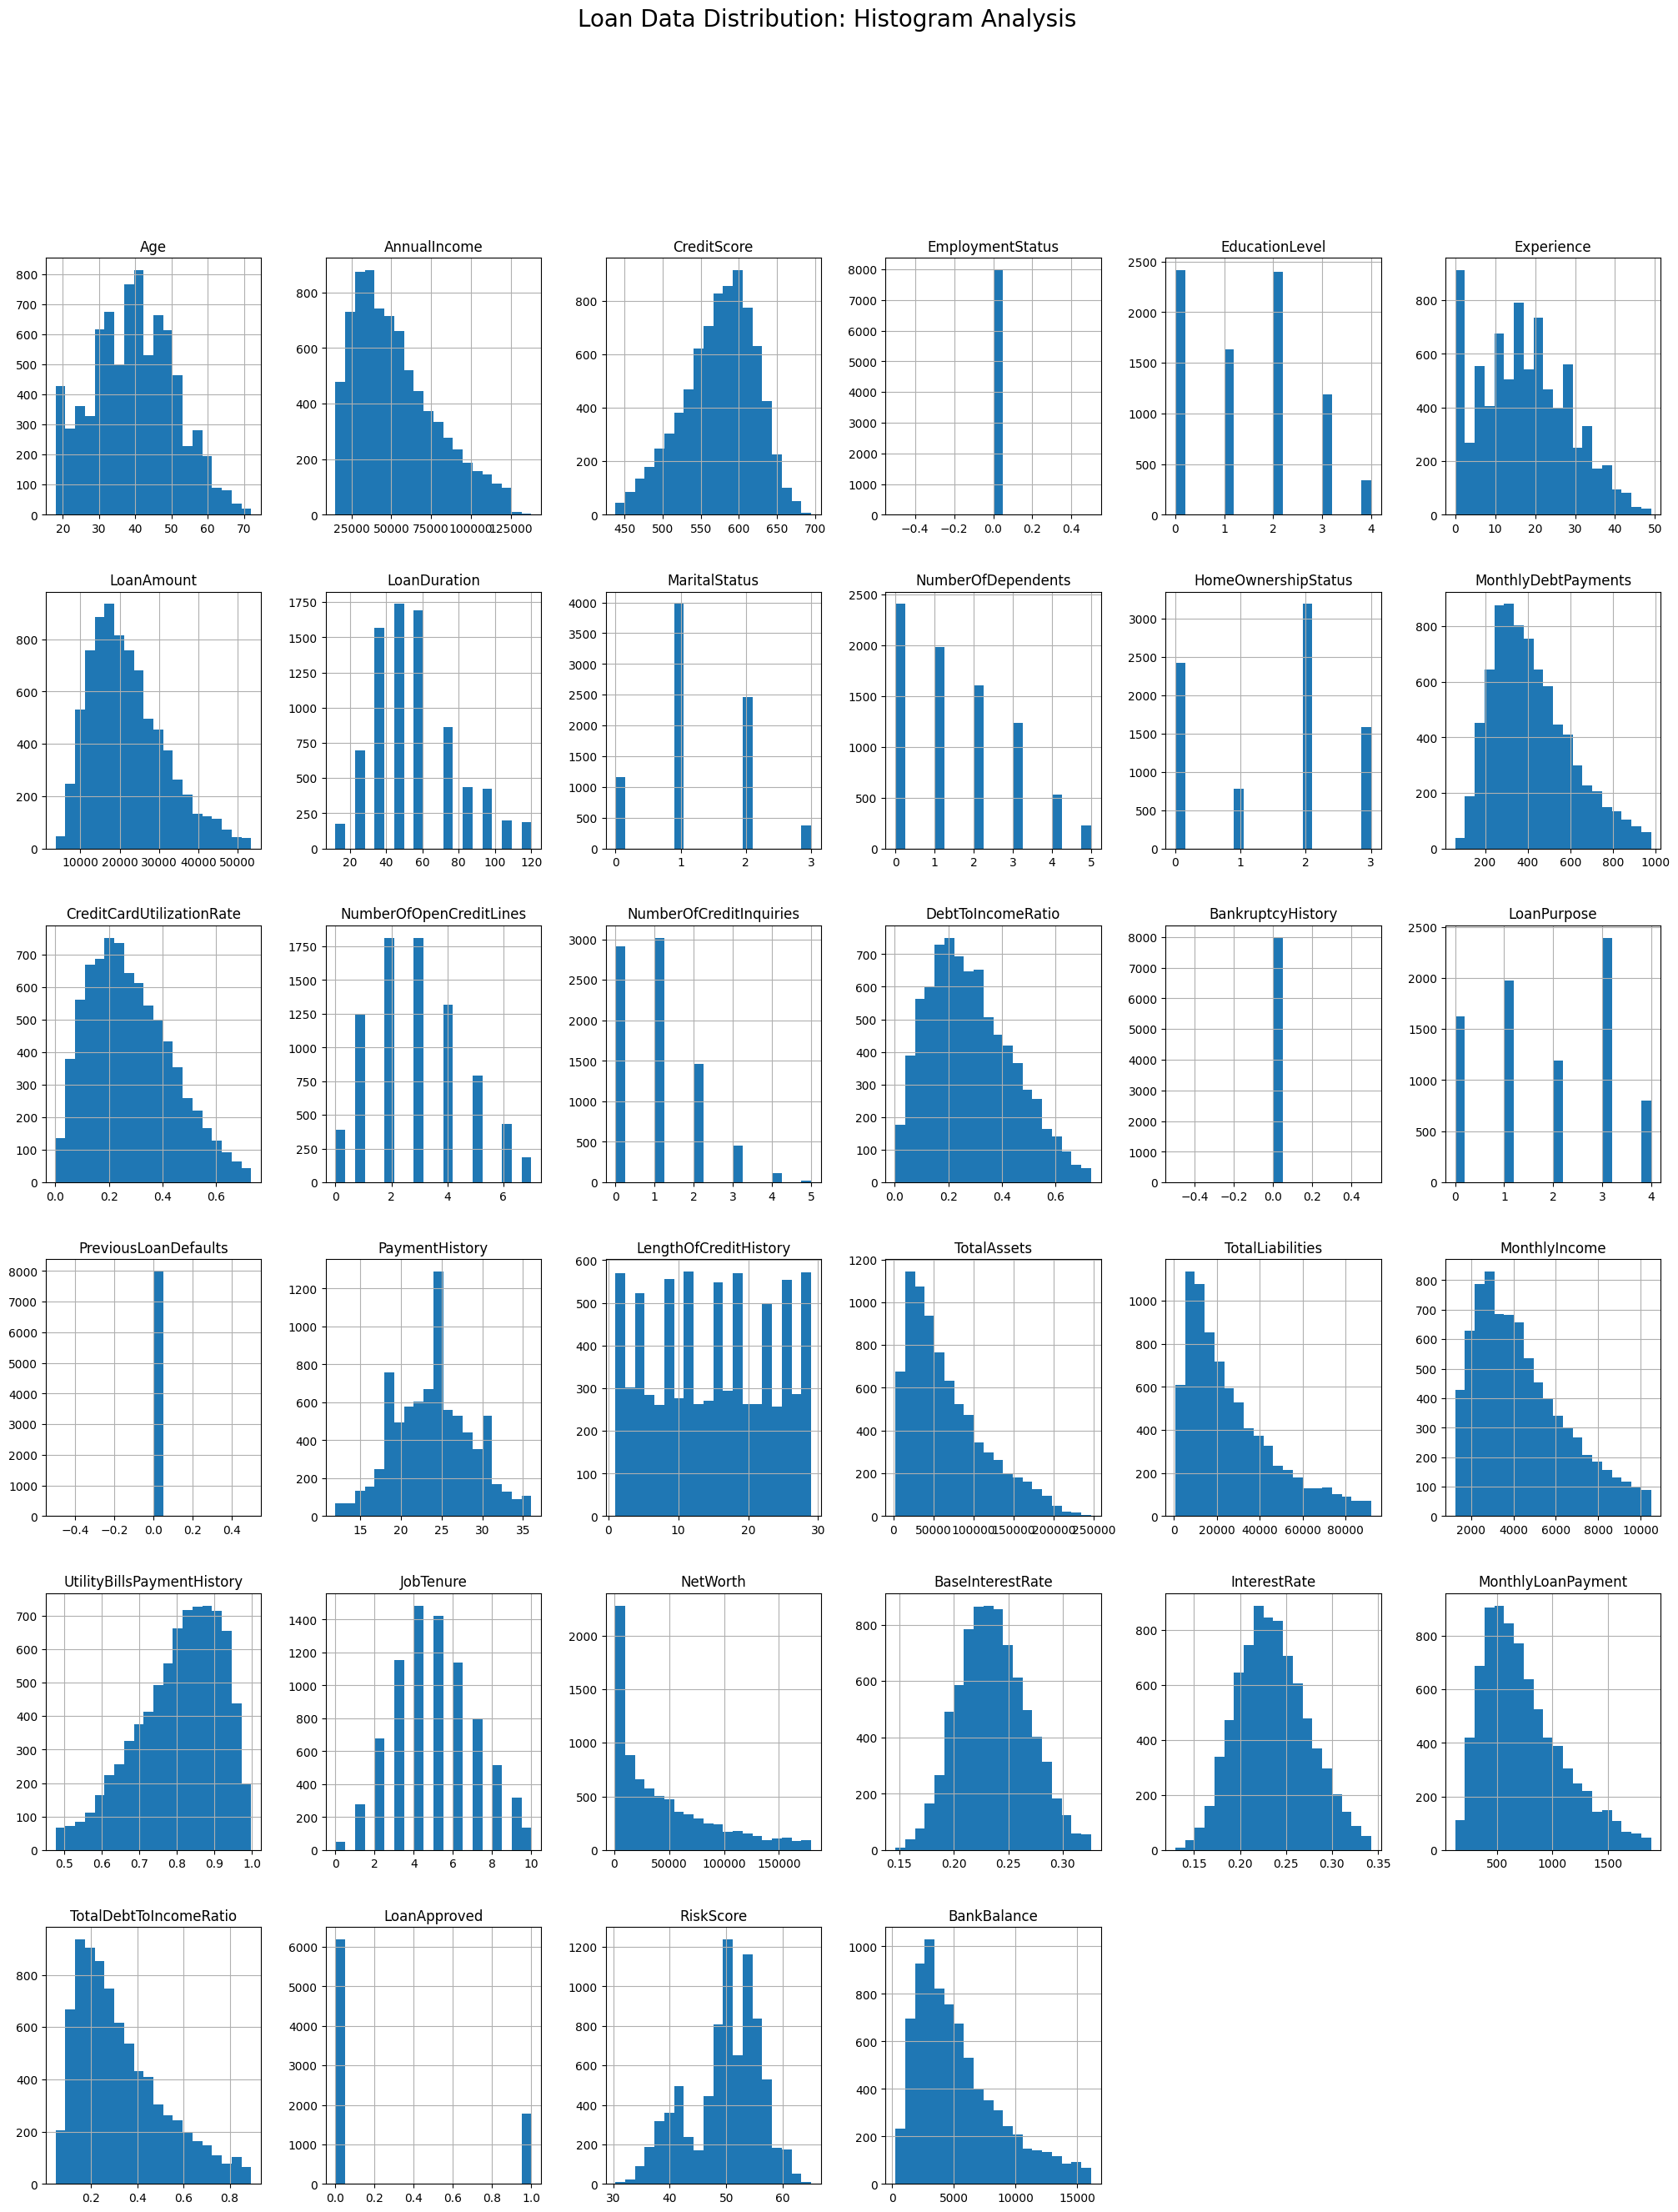

In [208]:
#before transforming the data(skewed data)
loan.hist(bins=20,figsize=(25,30))
plt.suptitle('Loan Data Distribution: Histogram Analysis',fontsize=20)
plt.show()

In [209]:
skewness=loan.skew()
skewness

Age                           0.105354
AnnualIncome                  0.758430
CreditScore                  -0.434159
EmploymentStatus              0.000000
EducationLevel                0.287203
Experience                    0.256878
LoanAmount                    0.766244
LoanDuration                  0.701115
MaritalStatus                 0.179516
NumberOfDependents            0.621194
HomeOwnershipStatus          -0.206154
MonthlyDebtPayments           0.726218
CreditCardUtilizationRate     0.518347
NumberOfOpenCreditLines       0.373768
NumberOfCreditInquiries       0.944505
DebtToIncomeRatio             0.491824
BankruptcyHistory             0.000000
LoanPurpose                   0.014825
PreviousLoanDefaults          0.000000
PaymentHistory                0.102025
LengthOfCreditHistory         0.015105
TotalAssets                   1.000162
TotalLiabilities              1.102493
MonthlyIncome                 0.759883
UtilityBillsPaymentHistory   -0.618950
JobTenure                

In [210]:
#calculate skewness for each column
skewness=loan.skew()

#sort the skewness values in ascending order
sorted_skewness=skewness.sort_values(ascending=True)

#disply the sorted skewness values
print(sorted_skewness)

UtilityBillsPaymentHistory   -0.618950
RiskScore                    -0.560588
CreditScore                  -0.434159
HomeOwnershipStatus          -0.206154
BankruptcyHistory             0.000000
EmploymentStatus              0.000000
PreviousLoanDefaults          0.000000
LoanPurpose                   0.014825
LengthOfCreditHistory         0.015105
PaymentHistory                0.102025
Age                           0.105354
MaritalStatus                 0.179516
BaseInterestRate              0.198869
InterestRate                  0.243512
JobTenure                     0.246907
Experience                    0.256878
EducationLevel                0.287203
NumberOfOpenCreditLines       0.373768
DebtToIncomeRatio             0.491824
CreditCardUtilizationRate     0.518347
NumberOfDependents            0.621194
LoanDuration                  0.701115
MonthlyDebtPayments           0.726218
AnnualIncome                  0.758430
MonthlyIncome                 0.759883
LoanAmount               

In [211]:
#create a copy of original data for comparison
loan_copy=loan.copy()

#log transformation of skewed columns ((annual income,loanamount))
loan['AnnualIncome']=np.log1p(loan['AnnualIncome'])#log1p log(1+x) to handle zero
loan['LoanAmount']=np.log1p(loan['LoanAmount'])

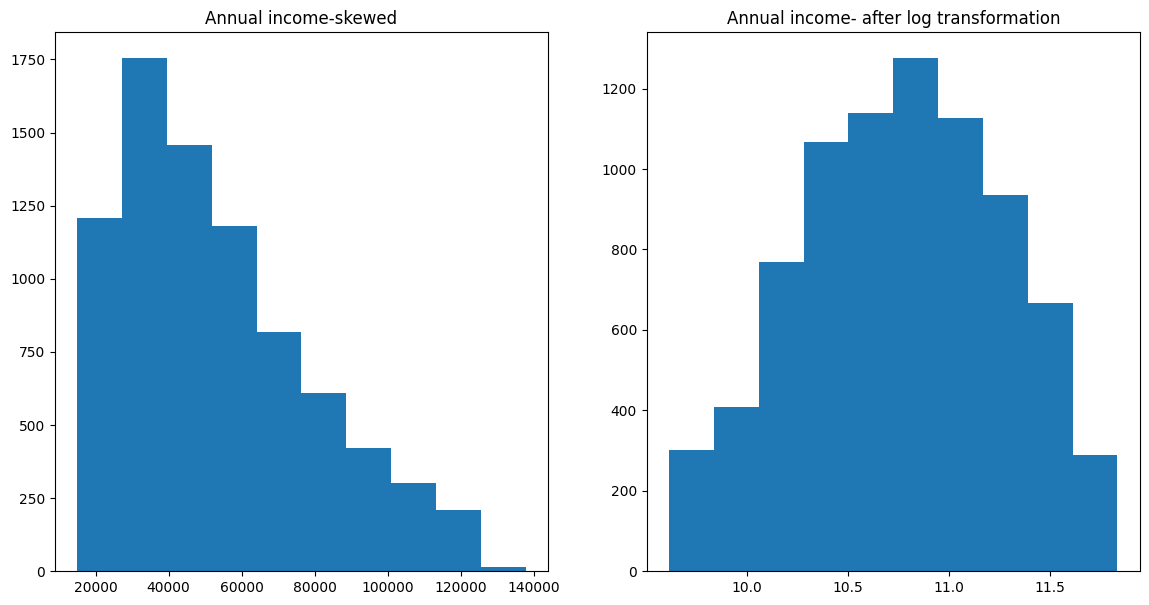

In [212]:
plt.figure(figsize=(14,7))

plt.subplot(1,2,1)
plt.hist(loan_copy['AnnualIncome'])
plt.title('Annual income-skewed')

plt.subplot(1,2,2)
plt.hist(loan['AnnualIncome'])
plt.title('Annual income- after log transformation')

plt.show()

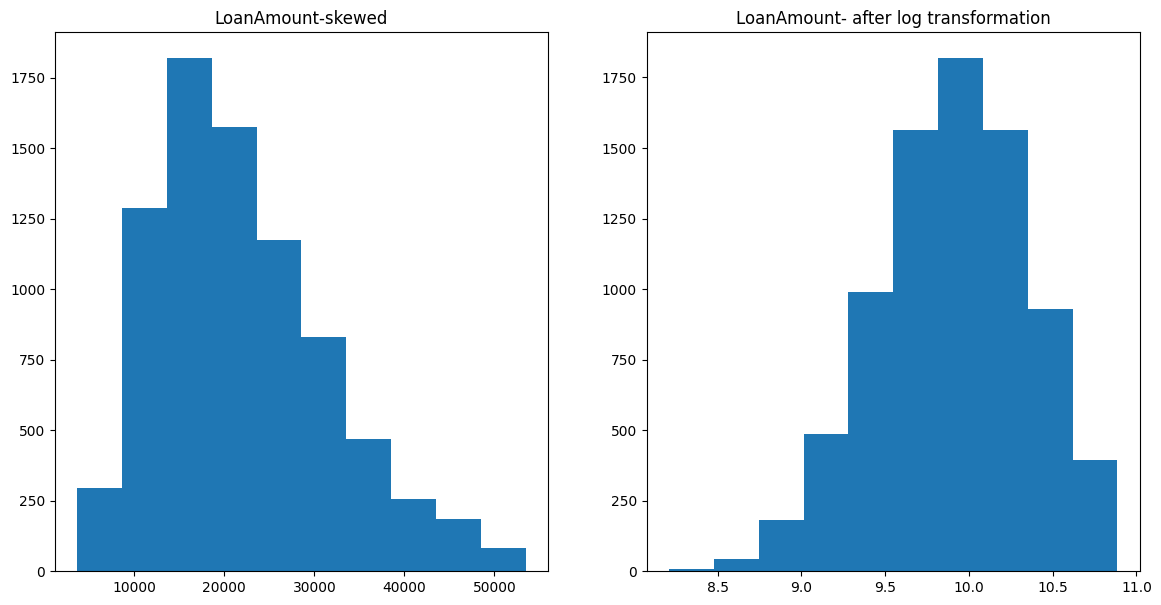

In [213]:
plt.figure(figsize=(14,7))

plt.subplot(1,2,1)
plt.hist(loan_copy['LoanAmount'])
plt.title('LoanAmount-skewed')

plt.subplot(1,2,2)
plt.hist(loan['LoanAmount'])
plt.title('LoanAmount- after log transformation')

plt.show()

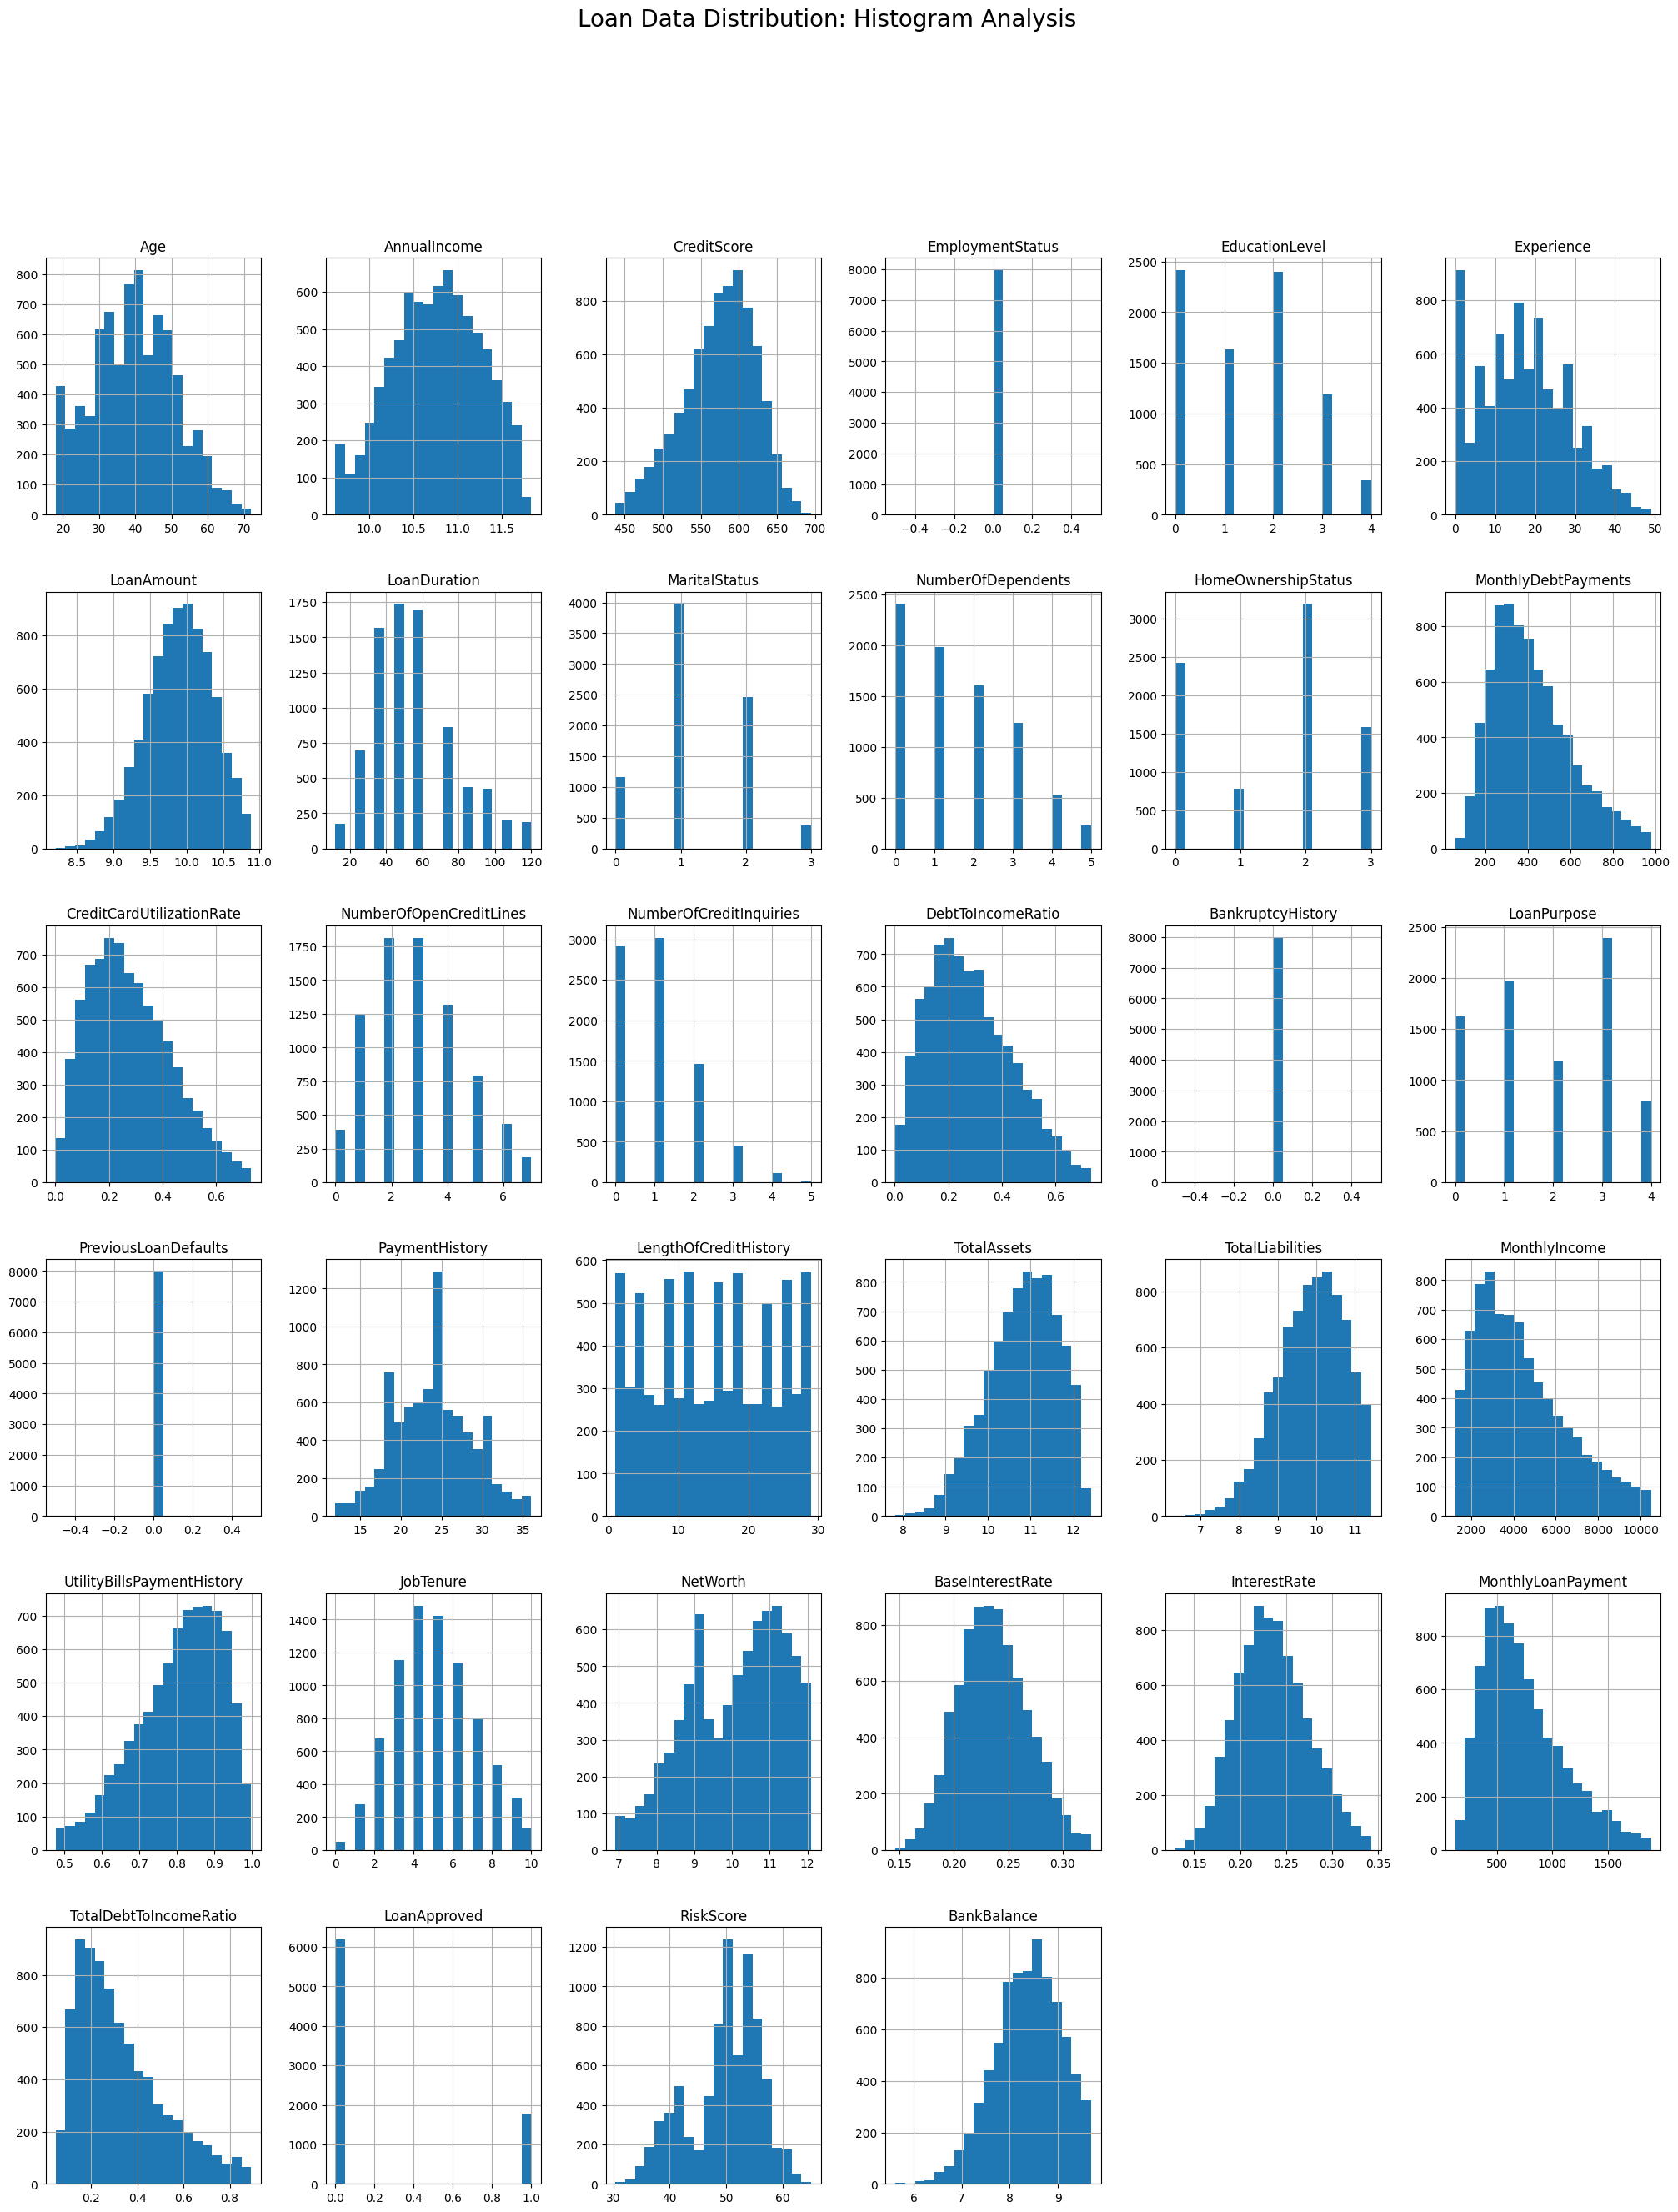

In [214]:
#step 1: select numeric column excluding LoanApproved
numeric_columns=loan.drop(columns=['LoanApproved']).select_dtypes(include=['number'])

#Step 2: Calculate skewness for numeric columns
skewness=numeric_columns.skew()

#Step 3: Identify columns wuth high skewness (tresold>1 or<-1)
high_skewed_columns=skewness[abs(skewness)>1].index

#Step 4: Apply log transformation for columns with high skewness
for col in high_skewed_columns:
    loan[col]=np.log1p(loan[col])#create a new column with log transformed value

loan.hist(bins=20,figsize=(25,30))
plt.suptitle('Loan Data Distribution: Histogram Analysis',fontsize=20)
plt.show()

### 2 :Removing Unwanted Features

In [215]:
# Based On Correlation
# after

In [216]:
loan.corr() #correalation matrix

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore,BankBalance
Age,1.000000,0.132130,0.305351,NaN,-0.030375,0.982086,0.018329,0.005996,-0.023616,-0.011029,...,-0.001278,0.000015,-0.012521,-0.215197,-0.176312,-0.003512,-0.112252,0.121213,-0.168522,0.002433
AnnualIncome,0.132130,1.000000,0.090088,NaN,0.132168,0.131656,0.074795,-0.030610,0.004021,0.002721,...,-0.005824,0.005151,0.007833,-0.063200,-0.052678,0.086624,-0.774973,0.530816,-0.520011,-0.001739
CreditScore,0.305351,0.090088,1.000000,NaN,0.219414,0.309655,0.021585,0.032848,-0.003042,-0.032162,...,-0.024286,0.002372,-0.005913,-0.714038,-0.566770,-0.070140,-0.112002,0.132084,-0.282261,-0.007356
EmploymentStatus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EducationLevel,-0.030375,0.132168,0.219414,NaN,1.000000,-0.024981,0.015581,-0.001597,0.021677,-0.017707,...,0.006119,-0.007779,0.014438,-0.159619,-0.128606,-0.005933,-0.113678,0.207619,-0.225293,-0.009468
Experience,0.982086,0.131656,0.309655,NaN,-0.024981,1.000000,0.020108,0.004109,-0.024146,-0.012614,...,-0.001439,-0.000548,-0.012342,-0.218956,-0.180989,-0.001659,-0.110503,0.121037,-0.171100,0.005121
LoanAmount,0.018329,0.074795,0.021585,NaN,0.015581,0.020108,1.000000,0.058247,-0.018358,-0.003347,...,-0.011977,-0.008378,0.004669,0.309030,0.237240,0.791725,0.341741,-0.248043,0.151608,-0.015117
LoanDuration,0.005996,-0.030610,0.032848,NaN,-0.001597,0.004109,0.058247,1.000000,0.003809,-0.003980,...,-0.003051,0.007745,-0.006552,0.609027,0.508969,-0.374585,-0.155596,-0.144551,0.090568,-0.012746
MaritalStatus,-0.023616,0.004021,-0.003042,NaN,0.021677,-0.024146,-0.018358,0.003809,1.000000,-0.015049,...,0.007005,0.003717,-0.004312,-0.001519,-0.001392,-0.017198,-0.009293,0.003172,0.005665,-0.014566
NumberOfDependents,-0.011029,0.002721,-0.032162,NaN,-0.017707,-0.012614,-0.003347,-0.003980,-0.015049,1.000000,...,0.009901,0.014620,-0.014487,0.019174,0.009962,-0.005144,-0.008987,0.000138,0.004369,0.000653


In [217]:
loan.cov()

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore,BankBalance
Age,129.386144,0.755099,163.541969,0.0,-0.408906,123.639119,0.093073,1.595291,-0.204145,-0.173144,...,-0.001638,0.000357,-0.180207,-0.077726,-0.077076,-14.448820,-0.238100,0.574526,-12.143370,0.018928
AnnualIncome,0.755099,0.252414,2.131139,0.0,0.078586,0.732082,0.016775,-0.359713,0.001535,0.001887,...,-0.000330,0.005447,0.004980,-0.001008,-0.001017,15.742412,-0.072604,0.111126,-1.655042,-0.000598
CreditScore,163.541969,2.131139,2217.037028,0.0,12.226867,161.371323,0.453701,36.176893,-0.108854,-2.090008,...,-0.128772,0.235095,-0.352257,-1.067566,-1.025613,-1194.609407,-0.983400,2.591510,-84.193030,-0.236929
EmploymentStatus,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
EducationLevel,-0.408906,0.078586,12.226867,0.0,1.400644,-0.327218,0.008232,-0.044218,0.019496,-0.028923,...,0.000815,-0.019378,0.021621,-0.005998,-0.005849,-2.539795,-0.025088,0.102388,-1.689086,-0.007665
Experience,123.639119,0.732082,161.371323,0.0,-0.327218,122.496835,0.099350,1.063807,-0.203095,-0.192686,...,-0.001793,-0.012776,-0.172843,-0.076950,-0.076985,-6.641339,-0.228064,0.558210,-11.996445,0.038769
LoanAmount,0.093073,0.016775,0.453701,0.0,0.008232,0.099350,0.199279,0.608194,-0.006228,-0.002062,...,-0.000602,-0.007873,0.002637,0.004380,0.004070,127.844114,0.028448,-0.046140,0.428738,-0.004616
LoanDuration,1.595291,-0.359713,36.176893,0.0,-0.044218,1.063807,0.608194,547.103666,0.067710,-0.128481,...,-0.008036,0.381311,-0.193928,0.452333,0.457526,-3169.288039,-0.678663,-1.408871,13.419847,-0.203943
MaritalStatus,-0.204145,0.001535,-0.108854,0.0,0.019496,-0.203095,-0.006228,0.067710,0.577533,-0.015784,...,0.000599,0.005945,-0.004147,-0.000037,-0.000041,-4.727635,-0.001317,0.001004,0.027274,-0.007572
NumberOfDependents,-0.173144,0.001887,-2.090008,0.0,-0.028923,-0.192686,-0.002062,-0.128481,-0.015784,1.904752,...,0.001539,0.042472,-0.025299,0.000840,0.000528,-2.568202,-0.002313,0.000079,0.038200,0.000617


<Axes: >

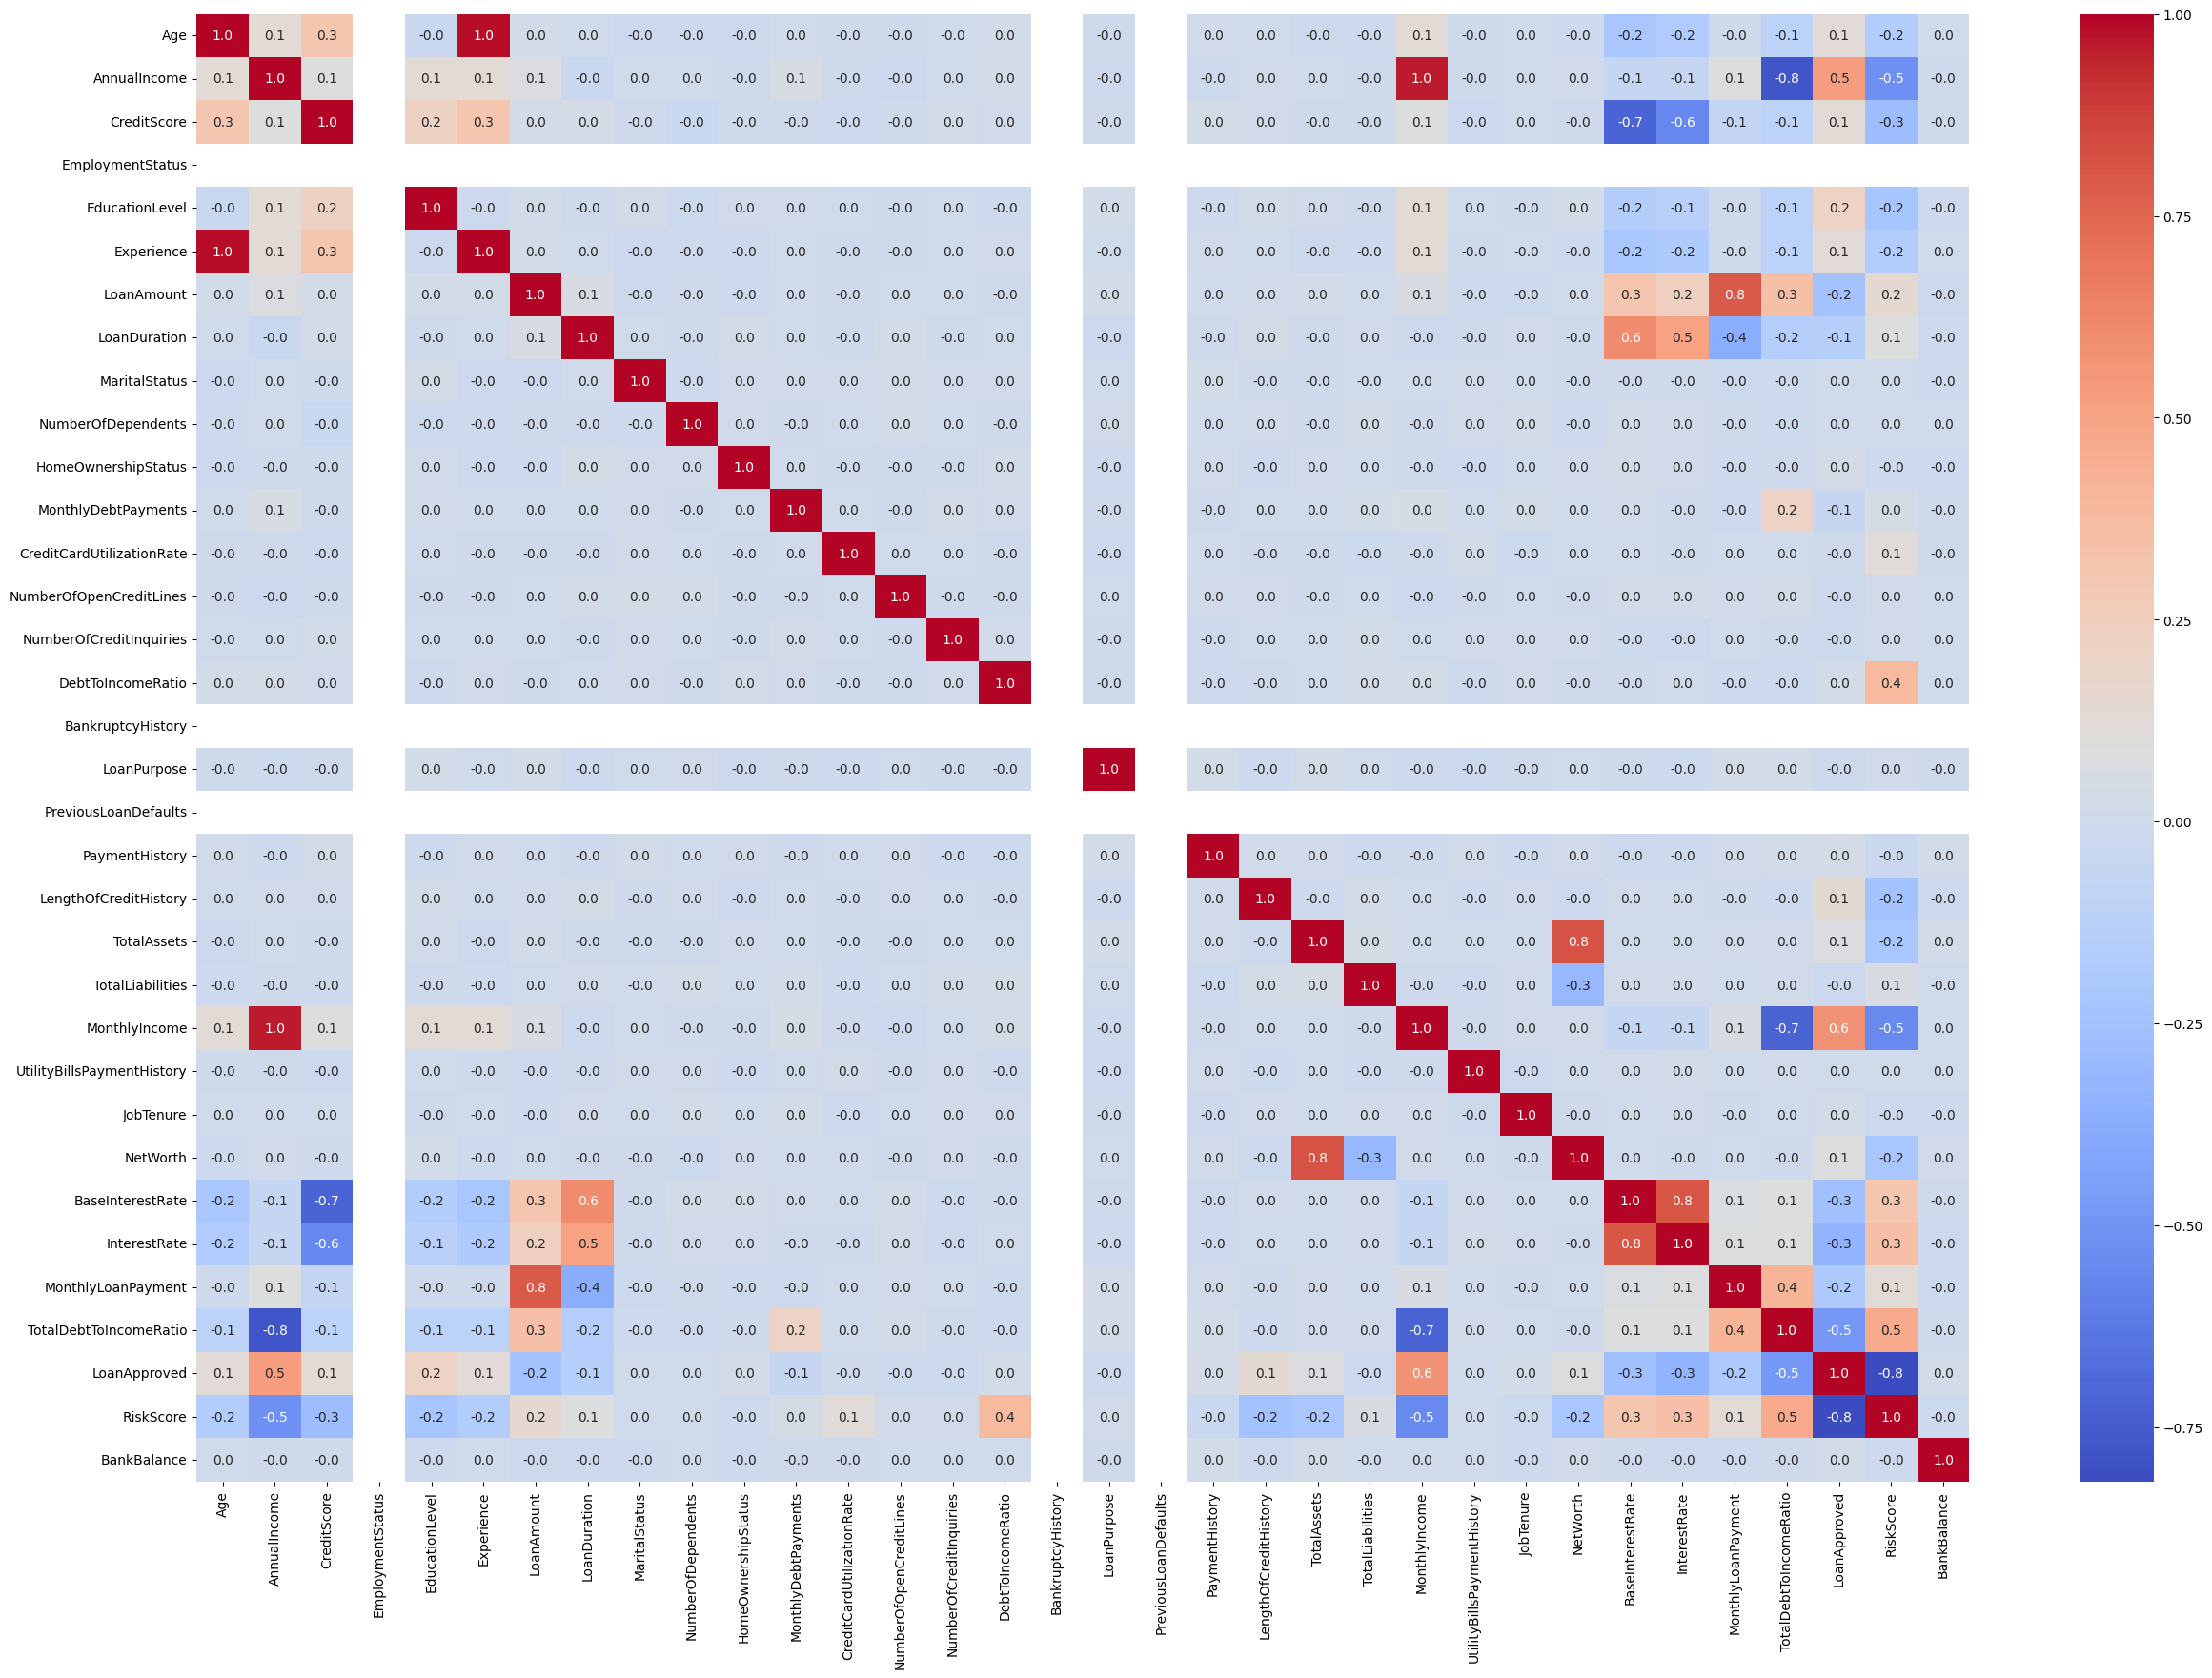

In [218]:
plt.figure(figsize=(30,20))
loan.corr(numeric_only=True)
sns.heatmap(loan.corr(numeric_only=True),annot=True,cmap='coolwarm',fmt='0.01f',annot_kws=None)

In [219]:
loan.columns

Index(['Age', 'AnnualIncome', 'CreditScore', 'EmploymentStatus',
       'EducationLevel', 'Experience', 'LoanAmount', 'LoanDuration',
       'MaritalStatus', 'NumberOfDependents', 'HomeOwnershipStatus',
       'MonthlyDebtPayments', 'CreditCardUtilizationRate',
       'NumberOfOpenCreditLines', 'NumberOfCreditInquiries',
       'DebtToIncomeRatio', 'BankruptcyHistory', 'LoanPurpose',
       'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory',
       'TotalAssets', 'TotalLiabilities', 'MonthlyIncome',
       'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth',
       'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment',
       'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore', 'BankBalance'],
      dtype='object')

In [220]:
loan[['TotalDebtToIncomeRatio','MonthlyIncome']].corr()

,TotalDebtToIncomeRatio,MonthlyIncome
TotalDebtToIncomeRatio,1.000000,-0.720002
MonthlyIncome,-0.720002,1.000000


In [221]:
loan.drop('TotalDebtToIncomeRatio',axis=1,inplace=True)

In [222]:
correlation_matrix=loan.corr()

#set the correlation threshold
threshold=0.5

#find pairs of features with high correlation
highly_correlated_paris=[]
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        #check if absolute correlation exceeds the thresold
        if abs(correlation_matrix.iloc[i,j])> threshold:
            highly_correlated_paris.append((correlation_matrix.columns[i],correlation_matrix.columns[j]))

# print all pairs of highly correlated features
print(highly_correlated_paris)

[('Experience', 'Age'), ('MonthlyIncome', 'AnnualIncome'), ('NetWorth', 'TotalAssets'), ('BaseInterestRate', 'CreditScore'), ('BaseInterestRate', 'LoanDuration'), ('InterestRate', 'CreditScore'), ('InterestRate', 'LoanDuration'), ('InterestRate', 'BaseInterestRate'), ('MonthlyLoanPayment', 'LoanAmount'), ('LoanApproved', 'AnnualIncome'), ('LoanApproved', 'MonthlyIncome'), ('RiskScore', 'AnnualIncome'), ('RiskScore', 'MonthlyIncome'), ('RiskScore', 'LoanApproved')]


In [223]:
loan.drop(['Experience','BaseInterestRate'],axis=1,inplace=True)

In [224]:
#step 1: Calculate the correlation of each feature with target
corr_with_target=loan.corr()['LoanApproved'].sort_values(ascending=False)

#Step 2: Set the threshold for low correlation (-0.05 to 0.05)
low_corr_features=corr_with_target[(corr_with_target > -0.05) & (corr_with_target < 0.05)]

#Step 3: Print the list of features with low corr
print('Feature with correlation between -0.05 to 0.05:')
print('-----------------------------------------------')
print(low_corr_features)

Feature with correlation between -0.05 to 0.05:
-----------------------------------------------
HomeOwnershipStatus           0.032109
PaymentHistory                0.029810
JobTenure                     0.019466
BankBalance                   0.018748
DebtToIncomeRatio             0.013346
MaritalStatus                 0.003172
UtilityBillsPaymentHistory    0.002547
NumberOfDependents            0.000138
CreditCardUtilizationRate    -0.005413
NumberOfCreditInquiries      -0.014879
LoanPurpose                  -0.015412
NumberOfOpenCreditLines      -0.016528
TotalLiabilities             -0.022648
Name: LoanApproved, dtype: float64


In [225]:
loan.drop(['PaymentHistory','HomeOwnershipStatus','JobTenure','BankBalance',
           'UtilityBillsPaymentHistory','NumberOfDependents','DebtToIncomeRatio',
           'NumberOfOpenCreditLines','MaritalStatus','NumberOfCreditInquiries',
           'LoanPurpose','CreditCardUtilizationRate','EmploymentStatus','TotalLiabilities'],
          axis=1,inplace=True)

The goal to retain features are strongly correlated with the target variable (either positively or negatively) and remove those that have little or no relationship

In [226]:
# Step 1: calculate the correlation of each feature with the target
corr_with_target=loan.corr()['RiskScore'].sort_values(ascending=False)

#Step 2: Set the threshold for low correlation (-0.05 to 0.05)
low_corr_features=corr_with_target[(corr_with_target > -0.05) & (corr_with_target < 0.05)]

#Step 3: Print the list of features with low corr
print('Feature with correlation between -0.05 to 0.05:')
print('-----------------------------------------------')
print(low_corr_features)

Feature with correlation between -0.05 to 0.05:
-----------------------------------------------
MonthlyDebtPayments    0.035177
Name: RiskScore, dtype: float64


In [227]:
loan.drop(['MonthlyDebtPayments'],axis=1,inplace=True)

#### PCA

PCA Reduce the number of features (dimensions) in a dataset.
- Principal components: these are new features created by pca. each principal components is linear combination of original features,and they are ranked based on the amount of variance they explian in the data

In [228]:
from sklearn.decomposition import PCA

#Apply PCA
pca=PCA(n_components=5) # you can change the number of components to retain
loan_pca=pca.fit_transform(loan)

# Create dataframe with the pca results
loan_pca_df=pd.DataFrame(loan_pca,columns=[f'PC{i+1}' for i in range(loan_pca.shape[1])])

# Step 5: Combine the pca components with the original dataframe if needed
loan_pca_original_df=pd.concat([loan.reset_index(drop=True),loan_pca_df], axis=1)

#Now loan_pca_final_df contain the original data along with the pca components
loan_pca_df.head()

,PC1,PC2,PC3,PC4,PC5
0,-1112.569327,66.236241,56.458069,-6.298666,-5.179157
1,1337.663289,294.008529,-27.427797,48.128898,19.586183
2,-155.147671,-345.643982,-11.955240,-15.847941,19.344884
3,3700.645162,1051.562222,-54.122588,-17.359243,11.547000
4,1779.232633,-277.738197,-7.682815,-1.521707,1.380889


### 3: Scaling

#### ***MinMaxScaler***
- Normalization transforms data to a specific range, usually [0,1] or [-1,1].The idea is to rescale the data without disorting the diffrences in the ranges of values
$$x'=\frac{x-min(x)}{max(x)-min(x)}$$
- Normalization preferred when you know the data does not follow a normal distribution and when you neet to constrain the data within a fixed range.It is commonly ysed in algorithms such as neural networks and k-means clustering where the magnitude of the data matters

In [229]:
# from sklearn.preprocessing import MinMaxScaler
# #create a copy of loan data for comparison
# loan_scaled=loan.copy()

# #Select numeric columns excluding 'loanApproved'
# numeric_columns=loan.drop(columns=['LoanApproved']).select_dtypes(include=['number']).columns

# #Initialize the standard scaler
# MinMax=MinMaxScaler()

# #Apply the scalar only to the numeric columns
# loan_scaled[numeric_columns]=MinMax.fit_transform(loan[numeric_columns])
# loan_scaled.head()

## Model Training And Evaluation

### Classification modeling

- Binary Loan Approval Classification:
To determine the binary outcome of loan appproval,indicating whether an applicant is likely to be approved or denied for loan

In [230]:
#convert 'loanApproved' from float to int
#loan['loanApproved']=loan['LoanApproved'].astype(int)

x=loan.drop(['LoanApproved','RiskScore'],axis=1)
y=loan[['LoanApproved']]

In [231]:
loan[['LoanApproved']].value_counts()

LoanApproved
0               6194
1               1784
Name: count, dtype: int64

In [232]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

print('Shape of training features :',x_train.shape)
print('Shape of testing features :',x_test.shape)
print('Shape of training target :',y_train.shape)
print('Shape of testing target :',y_test.shape)

Shape of training features : (6382, 14)
Shape of testing features : (1596, 14)
Shape of training target : (6382, 1)
Shape of testing target : (1596, 1)


### Scaling

standardization and normailization are two techniques used in data preprocessing to scale features

#### ***Standardization***

- Standardization transform data to have a mean of 0 and a standard deviation of 1. This is done by substracting the mean of data and dividing by standard deviation
$$x'=\frac{x-\mu}{\sigma}$$
- Standardization is useful when your data follows a normal distribution or if using mechine learning algorithms that assume normally distributed data(e.g:linear regression,logistic regression,SMV).It works well with algorithm that that relay on the distances between data points(e.g:KNN,PCA)

In [ ]:
# #create a copy of loan data for comparison
# loan_scaled=loan.copy()

# #Select numeric columns excluding 'loanApproved'
# numeric_columns=loan.drop(columns=['LoanApproved']).select_dtypes(include=['number']).columns

# #Initialize the standard scaler
# scaler=StandardScaler()

# #Apply the scalar only to the numeric columns
# loan_scaled[numeric_columns]=scaler.fit_transform(loan[numeric_columns])
# loan_scaled.head()

,Age,AnnualIncome,CreditScore,EducationLevel,LoanAmount,LoanDuration,BankruptcyHistory,PreviousLoanDefaults,LengthOfCreditHistory,TotalAssets,MonthlyIncome,NetWorth,InterestRate,MonthlyLoanPayment,LoanApproved,RiskScore
1,-0.140750,-0.344875,1.144227,-0.357261,0.592502,-0.322837,0.0,0.0,-0.707112,0.076454,-0.516410,0.461721,-0.896435,0.152412,0,0.366099
3,1.617632,0.757354,-0.618637,-1.202274,1.432731,1.729429,0.0,0.0,-0.588092,0.910547,0.619062,1.113295,1.701417,0.853138,0,0.681831
6,1.617632,0.162974,-0.215090,-1.202274,-1.009189,-0.322837,0.0,0.0,0.364074,0.334515,-0.070300,-0.088803,-0.787303,-0.961090,0,0.050367
7,0.826360,1.439976,-1.234578,-1.202274,-0.040482,-1.862037,0.0,0.0,-0.469071,0.004406,1.711473,0.365720,-0.687328,3.009214,1,-1.149413
12,0.210927,0.906333,-0.023936,0.487752,-0.477519,0.190229,0.0,0.0,-0.945154,-1.385816,0.826597,-1.214237,0.524548,-0.717132,0,0.997562


In [234]:
model = LogisticRegression()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

#Accuracy
acc=accuracy_score(y_test,y_pred)
print('Accuracy:', acc)
#Confusion matrix
print('\nConfusion Matrix :\n',confusion_matrix(y_test,y_pred))
# Detailed Classification Report
print('\nclassification report :\n',classification_report(y_test,y_pred))

Accuracy: 0.8897243107769424

Confusion Matrix :
 [[1162   59]
 [ 117  258]]

classification report :
               precision    recall  f1-score   support

           0       0.91      0.95      0.93      1221
           1       0.81      0.69      0.75       375

    accuracy                           0.89      1596
   macro avg       0.86      0.82      0.84      1596
weighted avg       0.89      0.89      0.89      1596



c:\Users\Pc\anaconda\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Pc\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [235]:
clas_models = {'lr':LogisticRegression(max_iter=500),
               'rfc':RandomForestClassifier(),
               'dtc':DecisionTreeClassifier(),
               'knn':KNeighborsClassifier(n_neighbors=11),
               'svm':SVC(kernel='linear'),
               'gbc':GradientBoostingClassifier(random_state=0, learning_rate=0.45),
               'etc':ExtraTreesClassifier(),
               'nb':GaussianNB()}

In [236]:
# Dictionary to store results
results={'Model':[],'Accuracy':[],'Precision':[],'Recall':[],'F1-Score':[]}

#Evaluate each model
for model_name,model in clas_models.items():
  #train model
  model.fit(x_train,y_train)
  model_pred=model.predict(x_test)
  #calculate matrics
  accuracy=accuracy_score(y_test,model_pred)
  precision=precision_score(y_test,model_pred)
  recall=recall_score(y_test,model_pred)
  f1= f1_score(y_test,model_pred)

  #store result in dictionary
  results['Model'].append(model)
  results['Accuracy'].append(accuracy)
  results['Precision'].append(precision)
  results['Recall'].append(recall)
  results['F1-Score'].append(f1)

#convert result to dataframe
result_df=pd.DataFrame(results)
result_df

c:\Users\Pc\anaconda\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Pc\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Pc\anaconda\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit

,Model,Accuracy,Precision,Recall,F1-Score
0,LogisticRegression(max_iter=500),0.897243,0.828660,0.709333,0.764368
1,"(DecisionTreeClassifier(max_features='sqrt', r...",0.913534,0.878594,0.733333,0.799419
2,DecisionTreeClassifier(),0.874687,0.735849,0.728000,0.731903
3,KNeighborsClassifier(n_neighbors=11),0.843358,0.714777,0.554667,0.624625
4,SVC(kernel='linear'),0.892231,0.794203,0.730667,0.761111
5,([DecisionTreeRegressor(criterion='friedman_ms...,0.917920,0.865269,0.770667,0.815233
6,"(ExtraTreeClassifier(random_state=711519550), ...",0.906015,0.878788,0.696000,0.776786
7,GaussianNB(),0.880326,0.739583,0.757333,0.748353


### **final classification prediction**

In [237]:
model = DecisionTreeClassifier()

model.fit(x_train, y_train)
model_pred = model.predict(x_test)

#calculate metrics
accuracy = accuracy_score(y_test,model_pred)
precision = precision_score(y_test,model_pred)
recall = recall_score(y_test,model_pred)
f1= f1_score(y_test,model_pred)
print(accuracy)
print(precision)
print(recall)
print(f1)

0.8759398496240601
0.7411444141689373
0.7253333333333334
0.7331536388140162


In [238]:
x.columns

Index(['Age', 'AnnualIncome', 'CreditScore', 'EducationLevel', 'LoanAmount',
       'LoanDuration', 'BankruptcyHistory', 'PreviousLoanDefaults',
       'LengthOfCreditHistory', 'TotalAssets', 'MonthlyIncome', 'NetWorth',
       'InterestRate', 'MonthlyLoanPayment'],
      dtype='object')

In [272]:
new_input = {
    'Age':43,
    'AnnualIncome':1000000,
    'CreditScore':230, 
    'EducationLevel':'Bachelor', 
    'LoanAmount':15000, 
    'LoanDuration':5,
    'BankruptcyHistory':0, 
    'PreviousLoanDefaults':3, 
    'LengthOfCreditHistory':590,
    'TotalAssets':500000, 
    'MonthlyIncome':83000,
    'NetWorth':120000, 
    'InterestRate':10,
    'MonthlyLoanPayment':10000
}

In [277]:
input_data = pd.DataFrame([new_input])

input_data

,Age,AnnualIncome,CreditScore,EducationLevel,LoanAmount,LoanDuration,BankruptcyHistory,PreviousLoanDefaults,LengthOfCreditHistory,TotalAssets,MonthlyIncome,NetWorth,InterestRate,MonthlyLoanPayment
0,43,1000000,230,Bachelor,15000,5,0,3,590,500000,83000,120000,10,10000


In [278]:
# Encode user categorical inputs using same encoders

input_data['EducationLevel'] = input_data['EducationLevel'].map({
    'High School':0,
    'Associate':1,
    'Bachelor':2,
    'Master':3,
    'Doctorate':4
})
print(input_data["EducationLevel"])


0    2
Name: EducationLevel, dtype: int64


In [279]:


input_data

,Age,AnnualIncome,CreditScore,EducationLevel,LoanAmount,LoanDuration,BankruptcyHistory,PreviousLoanDefaults,LengthOfCreditHistory,TotalAssets,MonthlyIncome,NetWorth,InterestRate,MonthlyLoanPayment
0,43,1000000,230,2,15000,5,0,3,590,500000,83000,120000,10,10000


In [280]:
#Prediction
result = model.predict(input_data)
print("\nPredicted status of loan approval:", result[0])


Predicted status of loan approval: 0


#### Save

In [281]:
import pickle

pickle.dump(model, open("final_model.pkl","wb"))

##

## Regession model

In [292]:
x1=loan.drop(['RiskScore','LoanApproved'],axis=1)
y1=loan[['RiskScore']]

x1_train,x1_test,y1_train,y1_test = train_test_split(x,y,random_state=42,test_size=0.2)

print('Shape of training features :',x1_train.shape)
print('Shape of testing features :',x1_test.shape)
print('Shape of training target :',y1_train.shape)
print('Shape of testing target :',y1_test.shape)

Shape of training features : (6382, 14)
Shape of testing features : (1596, 14)
Shape of training target : (6382, 1)
Shape of testing target : (1596, 1)


In [293]:
#models
models={
    'Linear_regression':LinearRegression(),
    'RandomForest_Regressor':RandomForestRegressor(),
    'GradientBoosting_Regressor':GradientBoostingRegressor(),
    'DecisionTree_Regressor':DecisionTreeRegressor(),
    'SVM':SVR(),
    'AdaBoostRegressor':AdaBoostRegressor(),
    'ExtraTreesRegressor':ExtraTreesRegressor(),
    'BaggingRegressor':BaggingRegressor(),
    'LGBMRegressor':LGBMRegressor(),
    'XGBRegressor':XGBRegressor()
}

In [294]:
# dictionary to score result
results={'Model': [], 'MSE':[], 'MAE':[],'R2':[] }

#Evaluate each model
for model_name,model in models.items():
  #train model
  model.fit(x1_train,y1_train)
  #make prediction
  y1_pred=model.predict(x1_test)

  #calculate matrix
  mse=mean_squared_error(y1_test,y1_pred)
  mae=mean_absolute_error(y1_test,y1_test)
  r2=r2_score(y1_test,y1_pred)

  # store result in dict
  results['Model'].append(model_name)
  results['MSE'].append(mse)
  results['MAE'].append(mae)
  results['R2'].append(r2)

result_df=pd.DataFrame(results)

result_df

c:\Users\Pc\anaconda\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Pc\anaconda\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
c:\Users\Pc\anaconda\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Pc\anaconda\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000177 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2124
[LightGBM] [Info] Number of data points in the train set: 6382, number of used features: 12
[LightGBM] [Info] Start training from score 0.220777


,Model,MSE,MAE,R2
0,Linear_regression,0.083015,0.0,0.538175
1,RandomForest_Regressor,0.061157,0.0,0.659777
2,GradientBoosting_Regressor,0.063453,0.0,0.647005
3,DecisionTree_Regressor,0.127820,0.0,0.288924
4,SVM,0.107987,0.0,0.399257
5,AdaBoostRegressor,0.090340,0.0,0.497429
6,ExtraTreesRegressor,0.061671,0.0,0.656916
7,BaggingRegressor,0.067387,0.0,0.625116
8,LGBMRegressor,0.059180,0.0,0.670776
9,XGBRegressor,0.066811,0.0,0.628321


### Regression on scaled data

In [305]:
x1s=loan.drop(['RiskScore','LoanApproved'],axis=1)
y1s=loan[["RiskScore"]]

x1s_train,x1s_test,y1s_train,y1s_test = train_test_split(x,y,random_state=42,test_size=0.2)

# dictionary to score result
results={'Model': [], 'MSE':[], 'MAE':[],'R2':[] }

#loop through the model,train them,and calculate the matrics
for model_name,model in models.items():
  #train model
  model.fit(x1s_train,y1s_train)
  #make prediction
  y1s_pred=model.predict(x1s_test)

  #calculate matrix
  mse1=mean_squared_error(y1s_test,y1s_pred)
  mae1=mean_absolute_error(y1s_test,y1s_test)
  r21=r2_score(y1s_test,y1s_pred)

  # store result in dict
  results['Model'].append(model_name)
  results['MSE'].append(mse1)
  results['MAE'].append(mae1)
  results['R2'].append(r21)

result_df=pd.DataFrame(results)

#sort by accuracy
result_df=result_df.sort_values(by="MSE",ascending=True)
result_df.style.background_gradient('Blues')
result_df

c:\Users\Pc\anaconda\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Pc\anaconda\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
c:\Users\Pc\anaconda\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Pc\anaconda\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000187 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2124
[LightGBM] [Info] Number of data points in the train set: 6382, number of used features: 12
[LightGBM] [Info] Start training from score 0.220777


,Model,MSE,MAE,R2
8,LGBMRegressor,0.059180,0.0,0.670776
1,RandomForest_Regressor,0.060966,0.0,0.660840
6,ExtraTreesRegressor,0.061762,0.0,0.656412
2,GradientBoosting_Regressor,0.063439,0.0,0.647079
7,BaggingRegressor,0.065871,0.0,0.633552
9,XGBRegressor,0.066811,0.0,0.628321
0,Linear_regression,0.083015,0.0,0.538175
5,AdaBoostRegressor,0.090136,0.0,0.498562
4,SVM,0.107987,0.0,0.399257
3,DecisionTree_Regressor,0.126566,0.0,0.295895


In [306]:
x1s

,Age,AnnualIncome,CreditScore,EducationLevel,LoanAmount,LoanDuration,BankruptcyHistory,PreviousLoanDefaults,LengthOfCreditHistory,TotalAssets,MonthlyIncome,NetWorth,InterestRate,MonthlyLoanPayment
1,38,10.589358,628,1,10.167619,48,0,0,9,10.881908,3309.083333,10.683042,0.201077,794.054238
3,58,11.143093,545,0,10.542680,96,0,0,10,11.560028,5757.000000,11.507440,0.300911,1047.506980
6,58,10.844490,564,0,9.452659,48,0,0,18,11.091712,4270.833333,9.986495,0.205271,391.300352
7,49,11.486027,516,0,9.885069,12,0,0,11,10.823332,8112.083333,10.561577,0.209113,1827.360055
12,42,11.217937,573,2,9.689985,60,0,0,7,9.693075,6204.416667,8.562549,0.255685,479.539890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19993,50,10.328069,588,2,9.592537,48,0,0,6,11.190735,2548.166667,8.144969,0.188936,437.333829
19995,44,10.314968,587,0,10.107326,36,0,0,7,11.301834,2515.000000,10.921034,0.195574,905.767712
19996,56,10.804604,567,1,10.158866,36,0,0,28,11.150117,4103.833333,11.066685,0.199168,958.395633
19997,44,10.798738,645,2,10.519592,72,0,0,8,11.592817,4079.833333,11.548910,0.226766,945.427454


### **final Regression Model**

In [307]:
model2 = LGBMRegressor()
#train model
model.fit(x1s_train,y1s_train)
#make prediction
y1s_pred=model.predict(x1s_test)

#calculate matrix
mse1=mean_squared_error(y1s_test,y1s_pred)
mae1=mean_absolute_error(y1s_test,y1s_test)
r21=r2_score(y1s_test,y1s_pred)

# store result in dict
print(mse1)
print(mae1)
print(r21)


0.066811203956604
0.0
0.6283209323883057


In [308]:
new_input = {
    'Age':43,
    'AnnualIncome':1000000,
    'CreditScore':230, 
    'EducationLevel':'Bachelor', 
    'LoanAmount':15000, 
    'LoanDuration':5,
    'BankruptcyHistory':12, 
    'PreviousLoanDefaults':3, 
    'LengthOfCreditHistory':590,
    'TotalAssets':500000, 
    'MonthlyIncome':83000,
    'NetWorth':120000, 
    'InterestRate':10,
    'MonthlyLoanPayment':10000
}

In [309]:
input_data = pd.DataFrame([new_input])

input_data

,Age,AnnualIncome,CreditScore,EducationLevel,LoanAmount,LoanDuration,BankruptcyHistory,PreviousLoanDefaults,LengthOfCreditHistory,TotalAssets,MonthlyIncome,NetWorth,InterestRate,MonthlyLoanPayment
0,43,1000000,230,Bachelor,15000,5,12,3,590,500000,83000,120000,10,10000


In [310]:
# Encode user categorical inputs using same encoders

input_data["EducationLevel"]= input_data["EducationLevel"].map({'High School':0,'Associate':1,'Bachelor':2,'Master':3,'Doctorate':4})

In [311]:
input_data

,Age,AnnualIncome,CreditScore,EducationLevel,LoanAmount,LoanDuration,BankruptcyHistory,PreviousLoanDefaults,LengthOfCreditHistory,TotalAssets,MonthlyIncome,NetWorth,InterestRate,MonthlyLoanPayment
0,43,1000000,230,2,15000,5,12,3,590,500000,83000,120000,10,10000


In [312]:
scaler=StandardScaler()
scaler.fit(x1s)

input_data=scaler.transform(input_data)
input_data

array([[ 2.98845664e-01,  1.99051494e+06, -7.30902525e+00,
         4.87751866e-01,  3.35815693e+04, -2.16132530e+00,
         1.20000000e+01,  3.00000000e+00,  6.84439163e+01,
         6.14989441e+05,  3.64483977e+01,  9.48354901e+04,
         2.54089082e+02,  2.56042794e+01]])

In [313]:
#Prediction
result = model.predict(input_data)
print("\nPredicted Riskscore:", result[0])


Predicted Riskscore: 0.40842843


In [ ]:
#save 
import pickle

pickle.dump(model, open("final_model2.pkl","wb"))



In [315]:
pickle.dump(scaler, open("scaler.pkl","wb"))

## Final report

Based on the analysis of the loan approval data set for predicting the `RiskScore`, the `LGBMRegressor` model model demonstrated the best performance among the tested models

Based on the evaluation of the classification models for predicting `loanapproval` ,the `DecisionTreeClassifier` with a learning rate of 0.45 and random state set to 0 emerged as the best-performing model .it achieved the highest accuracy and consistently strong results across precision,recall and F1-score, making it the most reliable model for classifying whether a loan is approved or not in the loan dataset.

In [ ]:
input_data = pd.DataFrame([new_input])

input_data